<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/assignments/AB_M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [2]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [3]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from datetime import datetime

### Data Loading

In [4]:
# Read the hour.csv file
df_hourly_basis = pd.read_csv('hour.csv', parse_dates=['dteday'], infer_datetime_format=True)
df_hourly_basis.shape

(17379, 17)

print the first five rows of dataset

In [5]:
df_hourly_basis.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [6]:
df_hourly_basis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [7]:
df_hourly_basis.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

In [8]:
df_hourly_basis.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
df_hourly_basis = df_hourly_basis.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'dteday':'date',
                       'cnt':'count'})
df_hourly_basis.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [10]:
def plot_by_year(data,col, title):
    dd = data.copy()     #flag 1
    dd['year'] = data.date.dt.year     #flag 2
    dd['month'] = data.date.dt.month   #flag 3
    dd['day'] = data.date.dt.day     #flag 4
    by_year = dd.groupby([col, 'year'])["count"].agg('sum').unstack()   #flag 5
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)  #flag 6

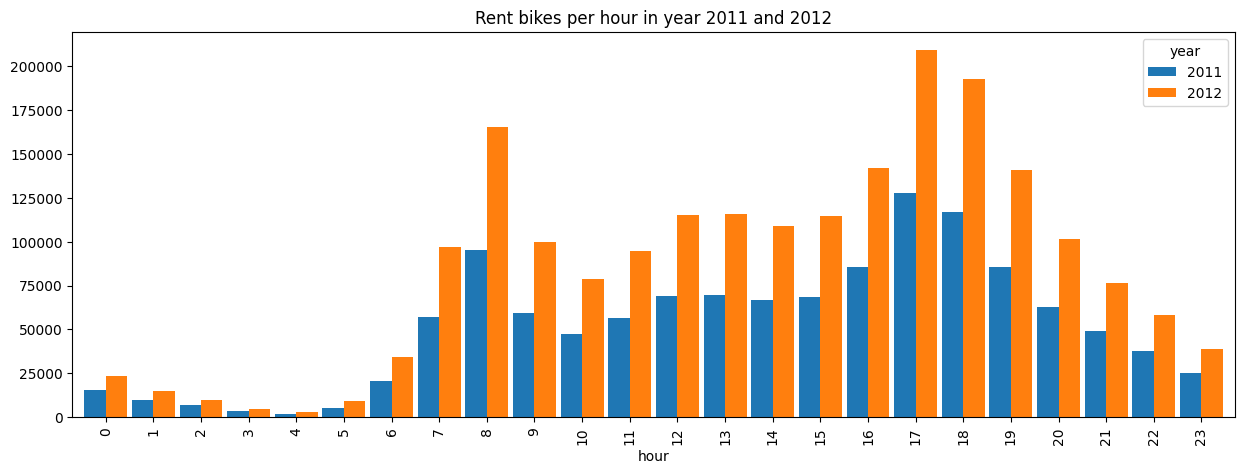

In [11]:
plot_by_year(df_hourly_basis, 'hour', 'Rent bikes per hour in year 2011 and 2012')
plt.show()
plt.close()

**Busy Bike Sharing Hours - 08.00 a.m and then between 05.00 to 06.00 pm**

#### Visualize the distribution of count, casual and registered variables

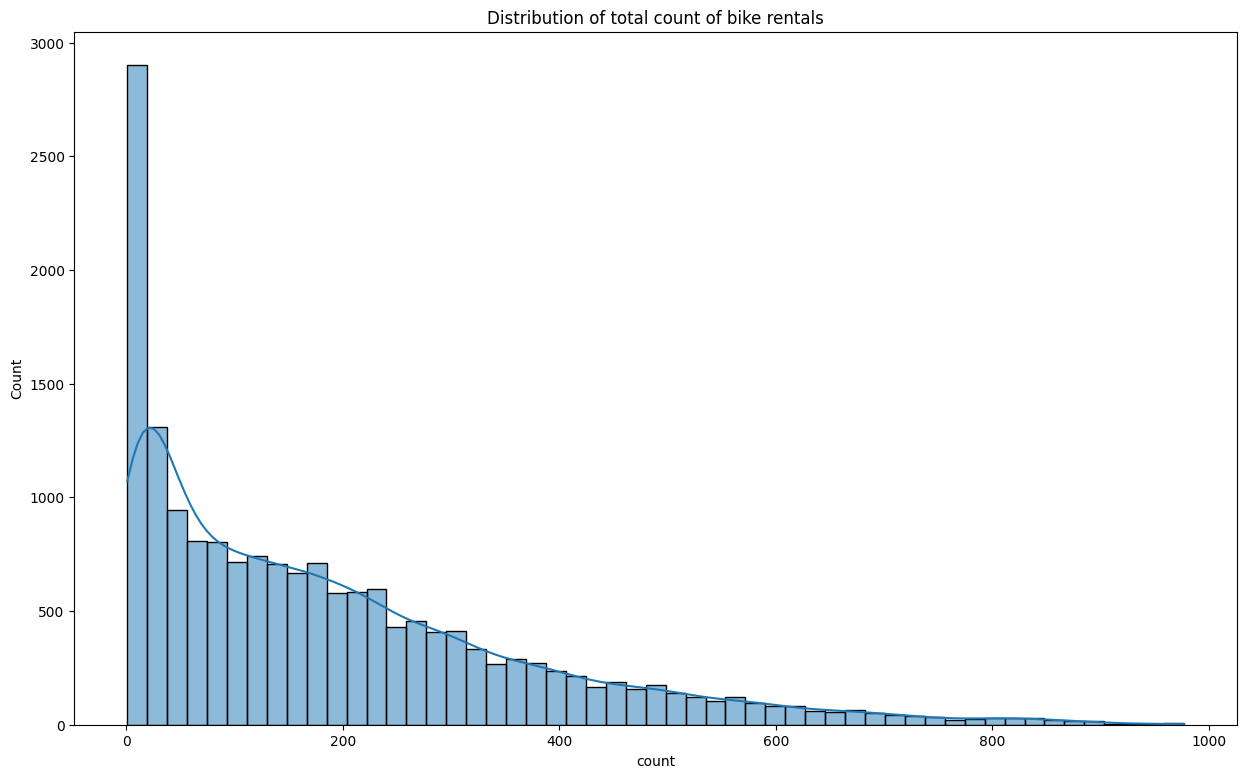

In [12]:
# distribuiton of count variable
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(df_hourly_basis["count"], kde = True)
plt.title('Distribution of total count of bike rentals')
plt.show()

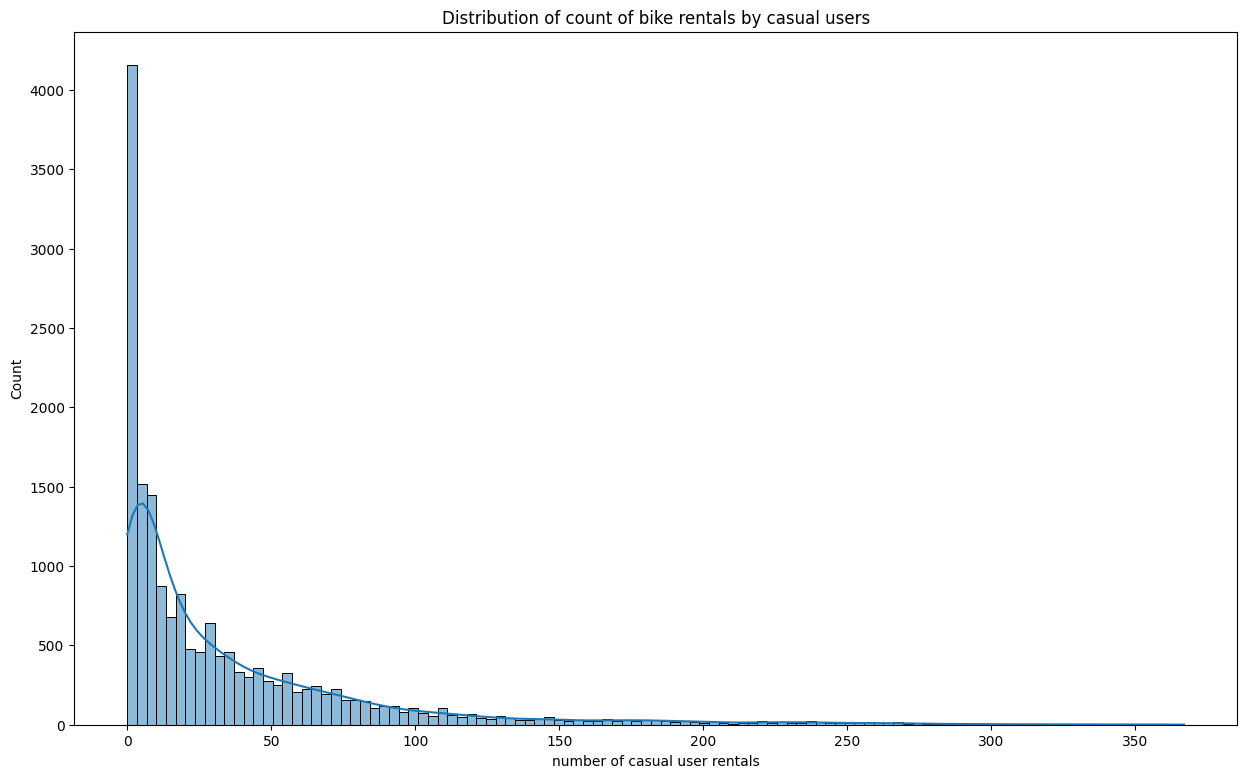

In [13]:
# distribuiton of casual variable
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(df_hourly_basis["casual"], kde = True)
plt.xlabel('number of casual user rentals')
plt.title('Distribution of count of bike rentals by casual users')
plt.show()

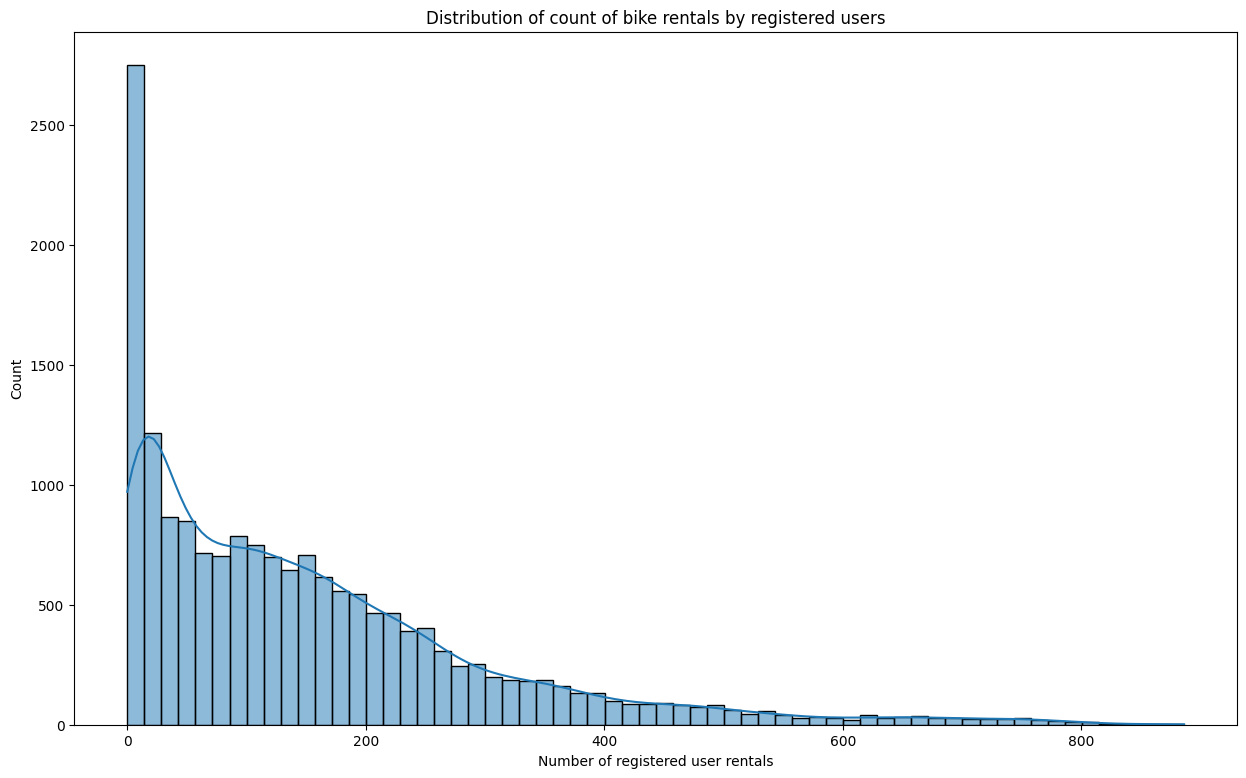

In [14]:
# distribuiton of registered variable
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(df_hourly_basis["registered"], kde = True)
plt.xlabel('Number of registered user rentals')
plt.title('Distribution of count of bike rentals by registered users')
plt.show()

#### Describe the relation of weekday, holiday and working day

Text(0, 0.5, 'Count')

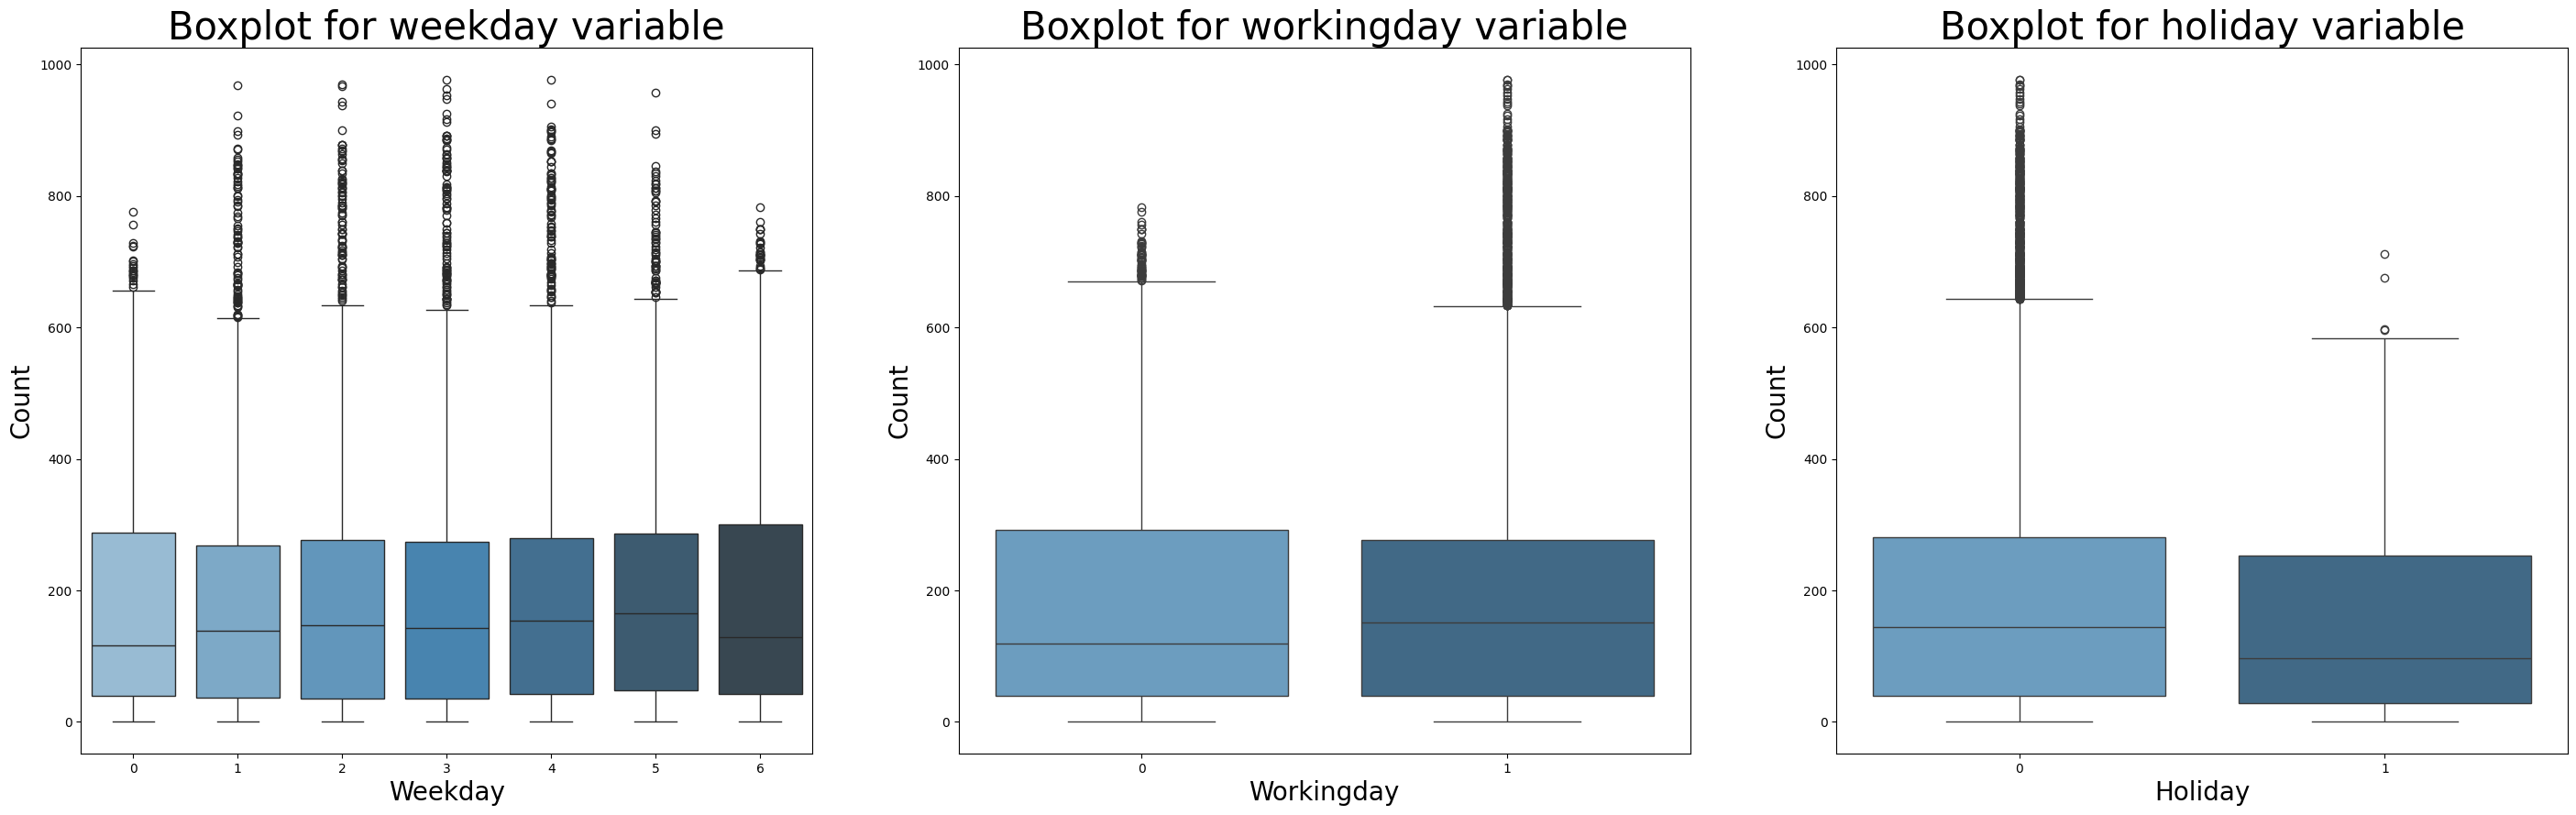

In [15]:
fig, (ax5, ax6, ax7) = plt.subplots(ncols=3, figsize=(35, 10))
sns.boxplot(x='weekday', y='count', data=df_hourly_basis, ax=ax5, palette='Blues_d')
ax5.set_title('Boxplot for weekday variable',fontsize=30)
ax5.set_xlabel('Weekday' , fontsize = 20)
ax5.set_ylabel('Count' , fontsize = 20)
sns.boxplot(x='workingday', y='count', data=df_hourly_basis, ax=ax6, palette='Blues_d')
ax6.set_title('Boxplot for workingday variable',fontsize= 30)
ax6.set_xlabel('Workingday' , fontsize = 20)
ax6.set_ylabel('Count' , fontsize = 20)
sns.boxplot(x='holiday', y='count', data=df_hourly_basis, ax=ax7, palette='Blues_d')
ax7.set_title('Boxplot for holiday variable',fontsize= 30)
ax7.set_xlabel('Holiday' , fontsize = 20)
ax7.set_ylabel('Count' , fontsize = 20)

**Count of Bikesharing is higher on weekdays ( 1- 5 ) compared to weekends
( 0, 6 ) and holidays.**

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

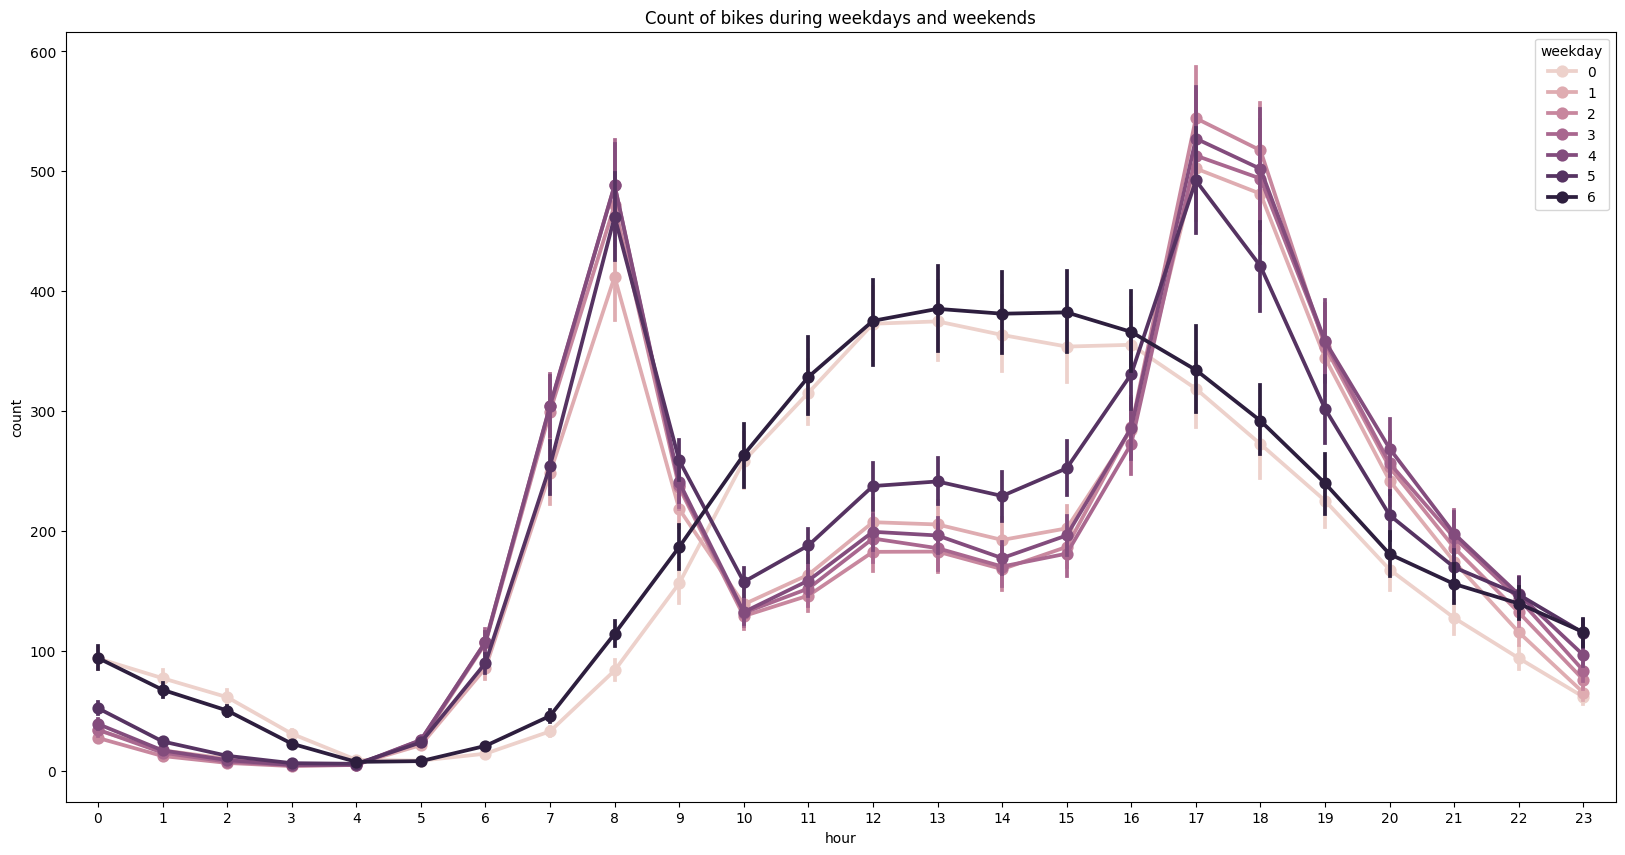

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_hourly_basis, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during different days')]

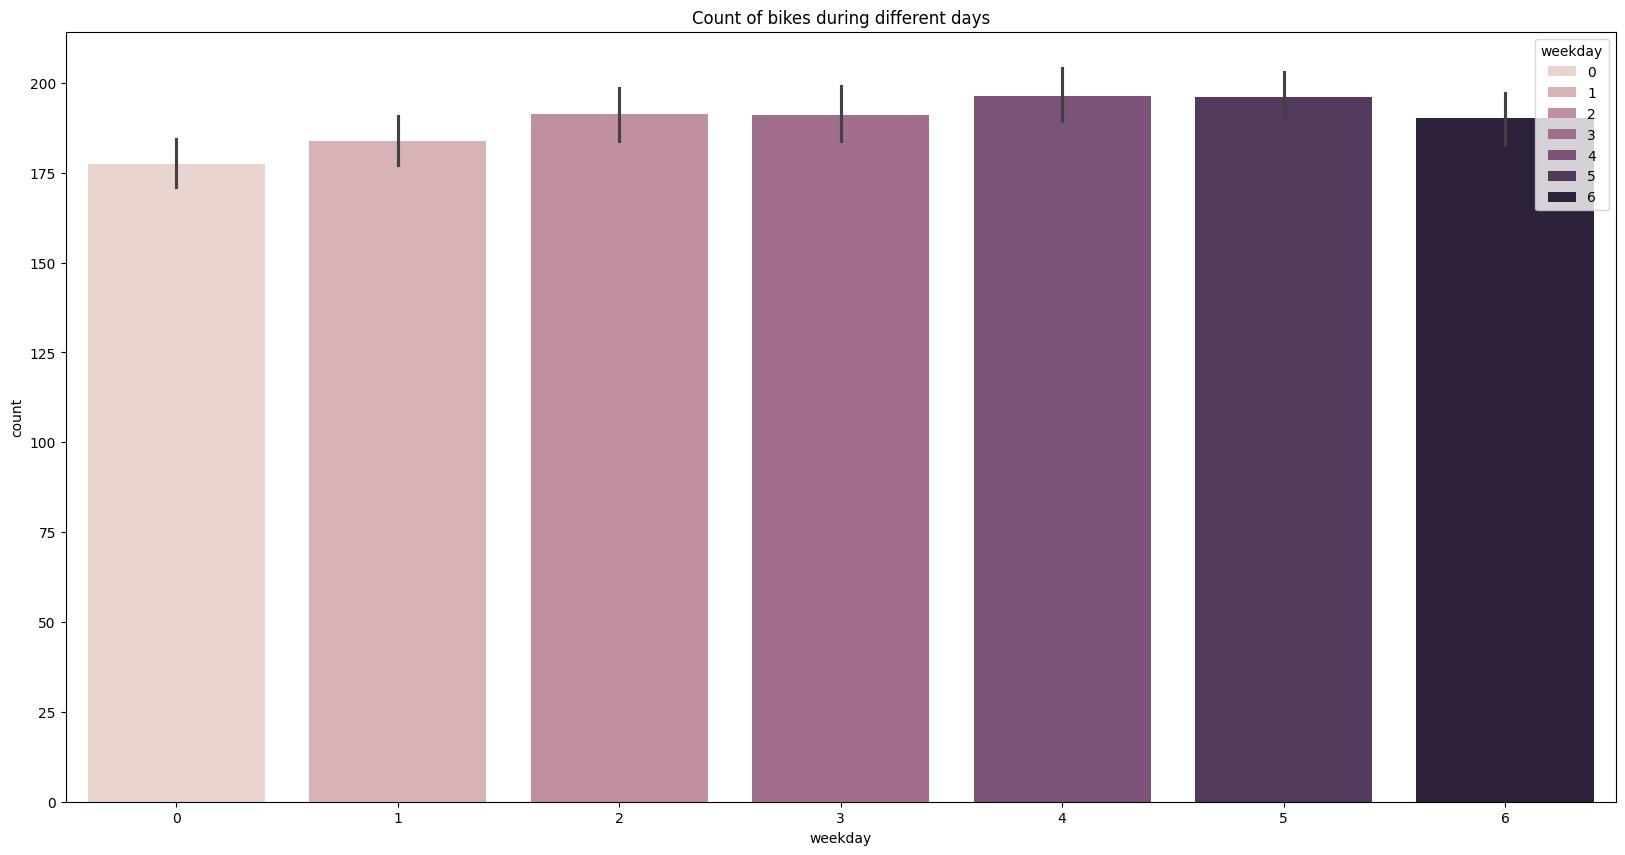

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_hourly_basis, x='weekday', y='count', ax=ax, hue ='weekday')
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Count of bikes during holidays')]

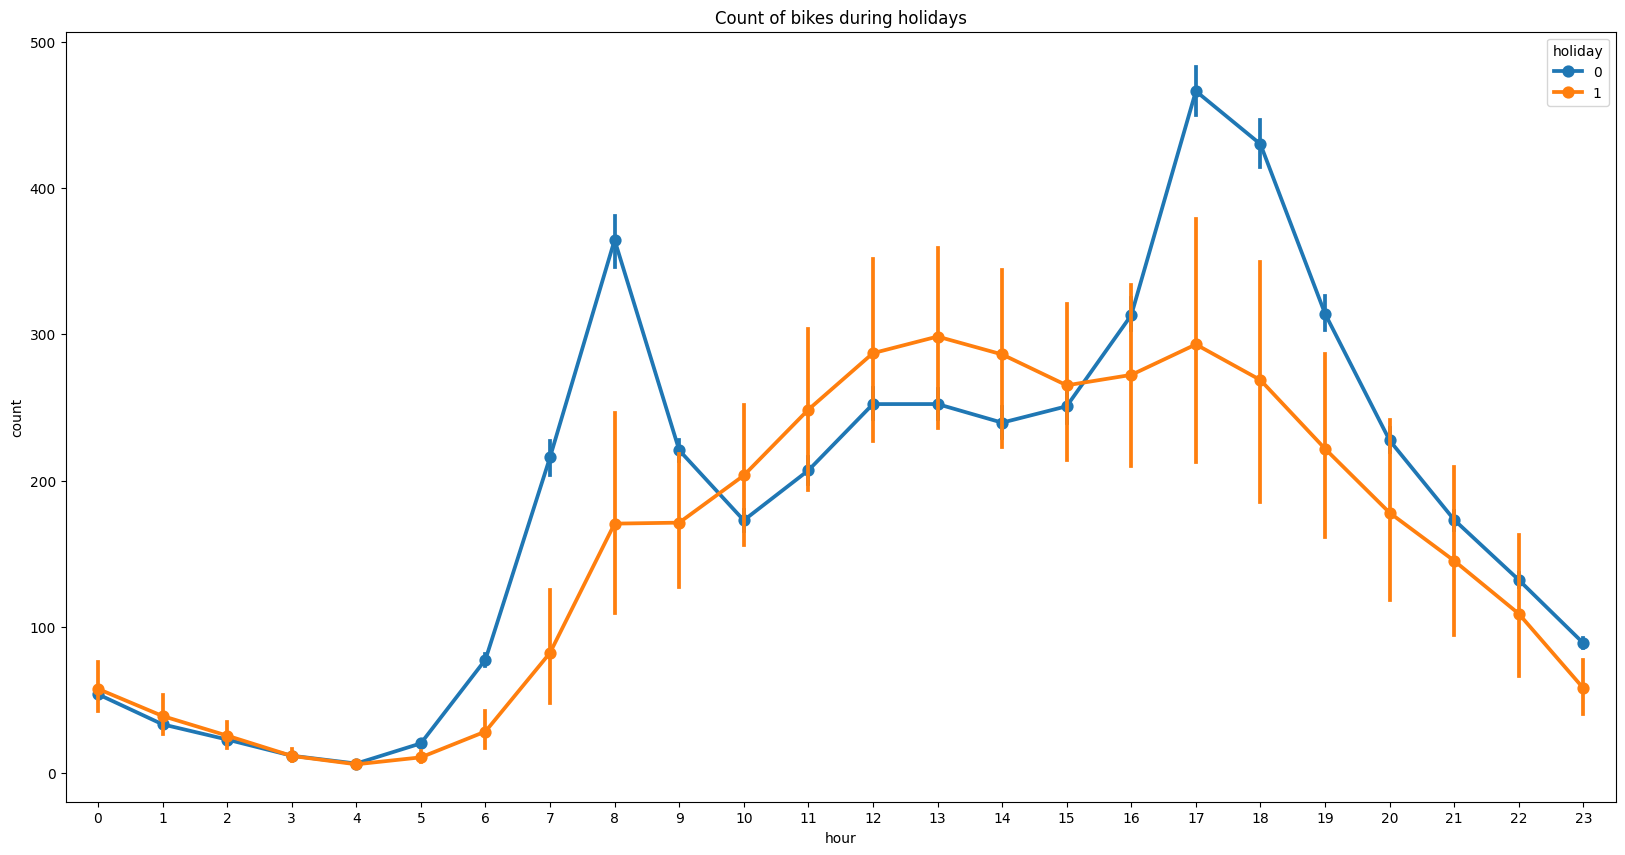

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_hourly_basis, x='hour', y='count', hue='holiday', ax=ax)
ax.set(title='Count of bikes during holidays')

[Text(0.5, 1.0, 'Count of bikes during non-holidays and holidays')]

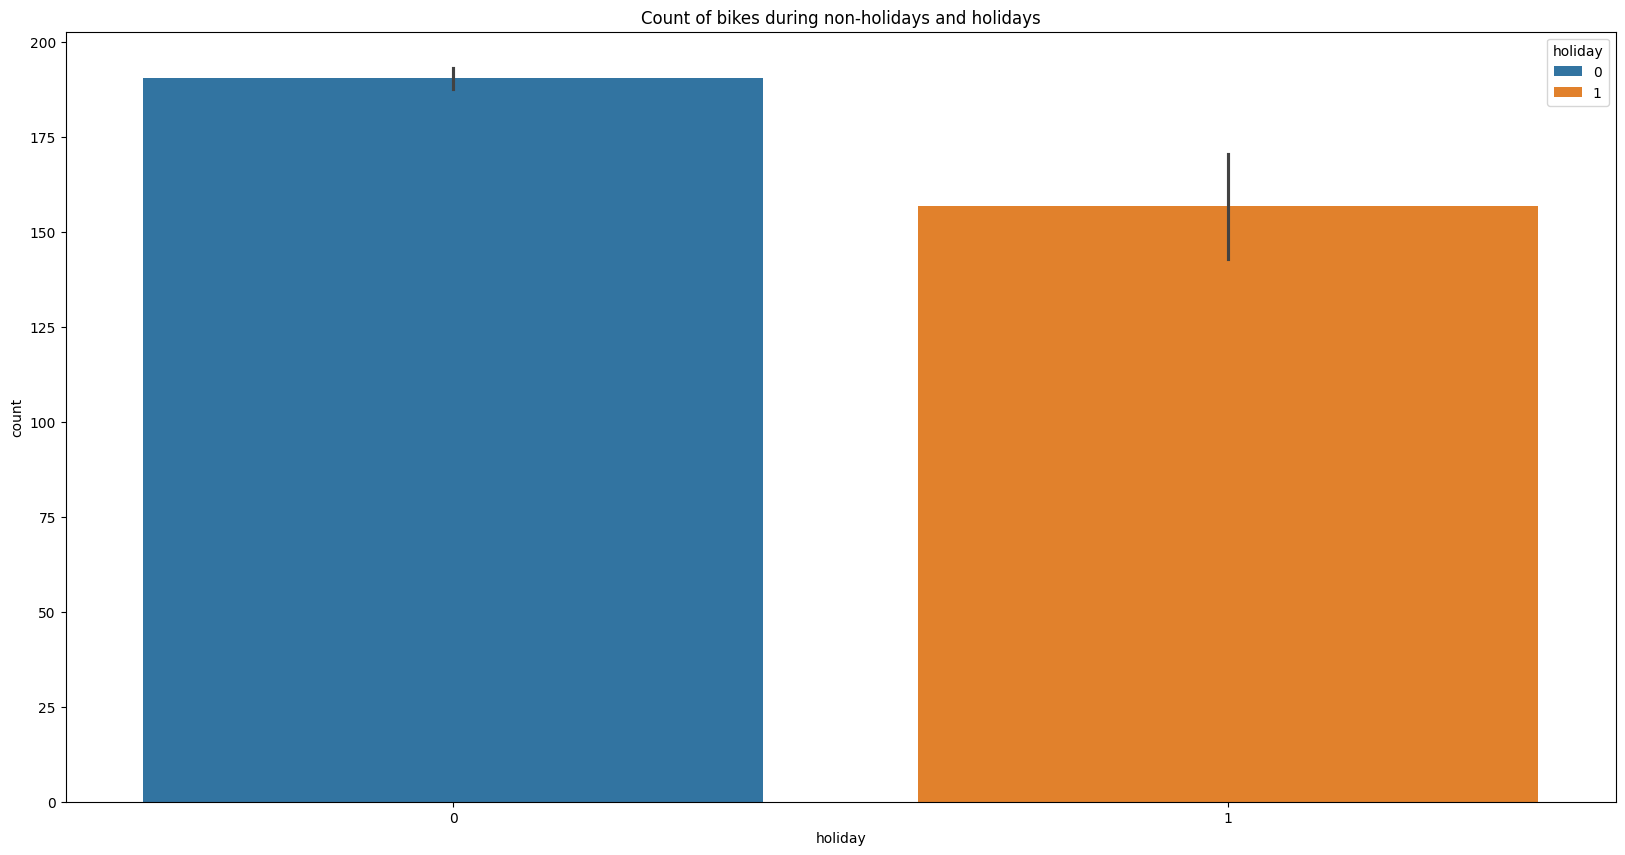

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_hourly_basis, x='holiday', y='count', ax=ax, hue ='holiday')
ax.set(title='Count of bikes during non-holidays and holidays')

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

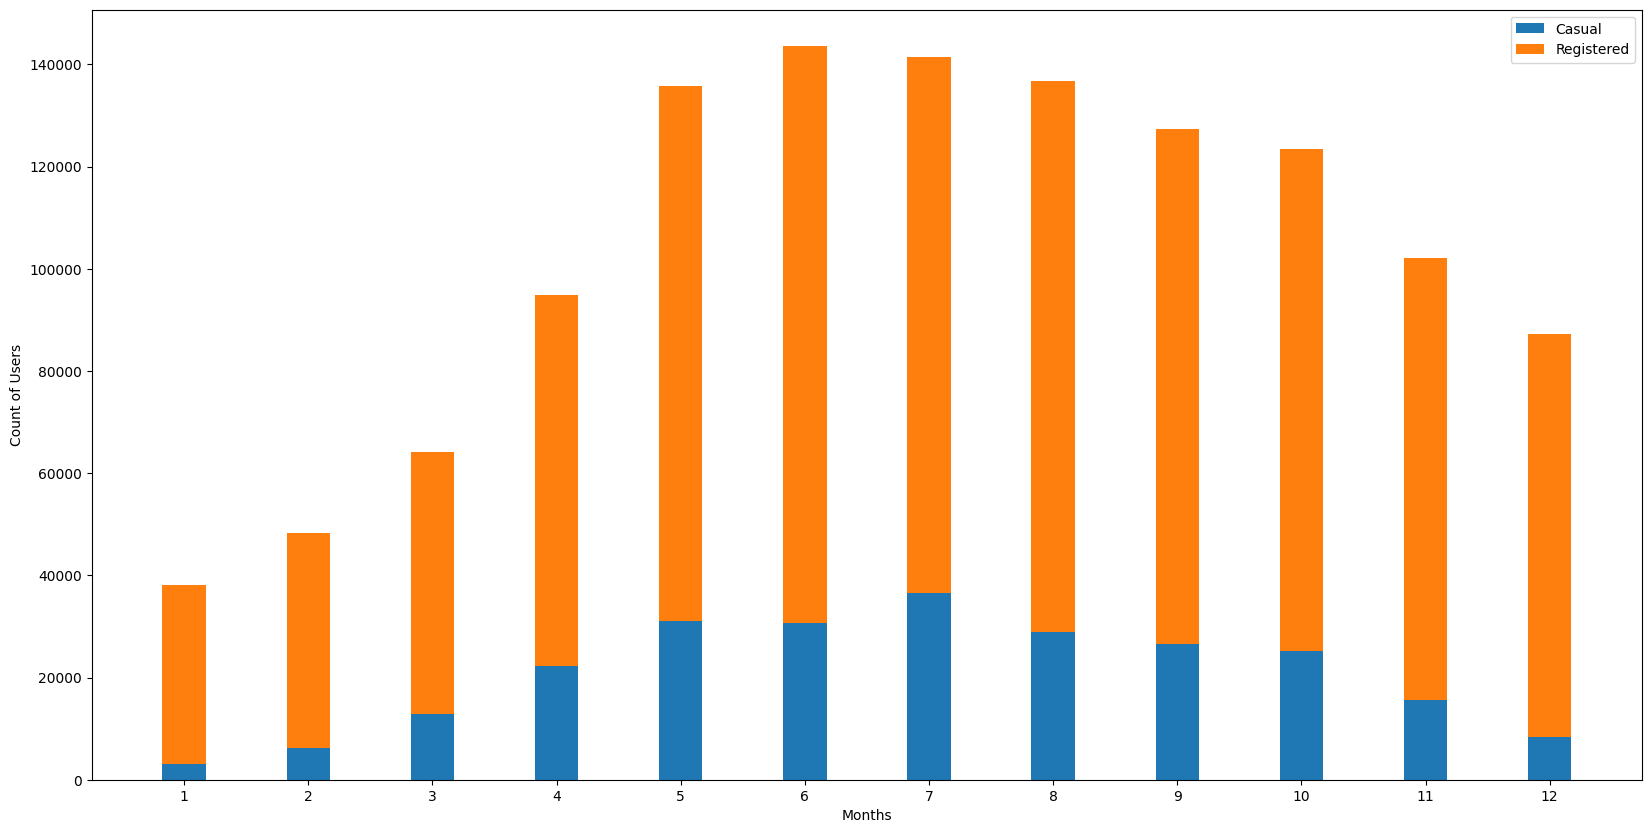

In [20]:
# stacked bar chart for year 2011
year_to_filter = 2011
filtered_df = df_hourly_basis[df_hourly_basis['date'].dt.year == year_to_filter]
df_casual_cnt = filtered_df.groupby('month')['casual'].sum()
df_regist_cnt = filtered_df.groupby('month')['registered'].sum()
fig, ax = plt.subplots(figsize=(20,10))
plot_casual_cnt = plt.bar(df_casual_cnt.index,df_casual_cnt.values, width = 0.35)
plot_regist_cnt = plt.bar(df_regist_cnt.index,df_regist_cnt.values, bottom = df_casual_cnt.values, width = 0.35)
#df_regist_cnt.plot.bar(stacked=True, color='c', label='Registered')
plt.ylabel('Count of Users')
plt.xlabel('Months')
plt.xticks(df_casual_cnt.index)
plt.legend((plot_casual_cnt[0],plot_regist_cnt[0]),('Casual','Registered'))
plt.show()
plt.close()

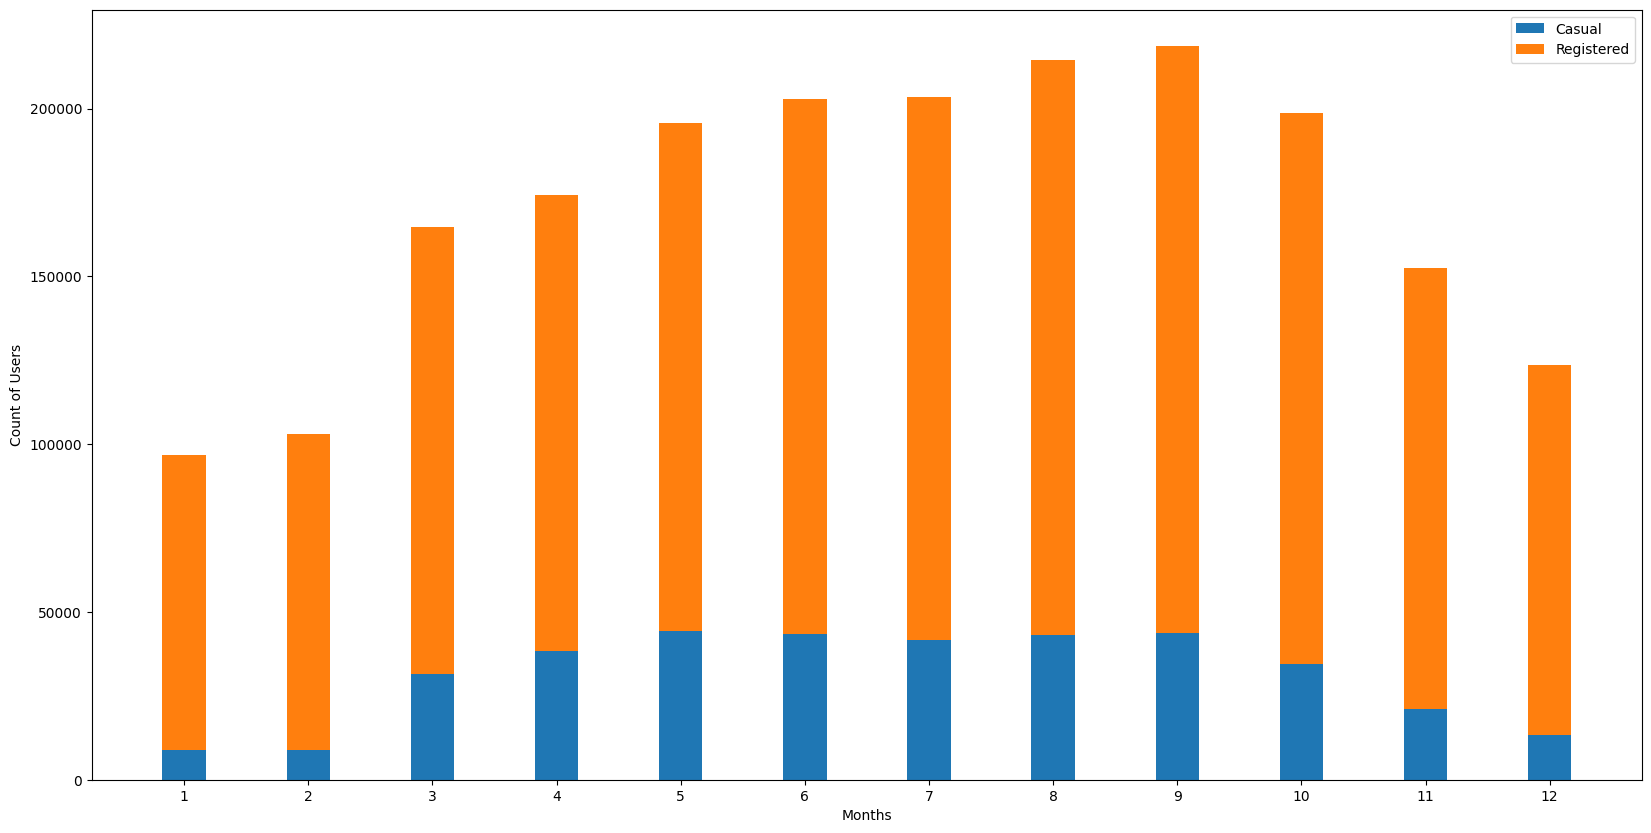

In [21]:
# stacked bar chart for year 2012
year_to_filter = 2012
filtered_df = df_hourly_basis[df_hourly_basis['date'].dt.year == year_to_filter]
df_casual_cnt = filtered_df.groupby('month')['casual'].sum()
df_regist_cnt = filtered_df.groupby('month')['registered'].sum()
fig, ax = plt.subplots(figsize=(20,10))
plot_casual_cnt = plt.bar(df_casual_cnt.index,df_casual_cnt.values, width = 0.35)
plot_regist_cnt = plt.bar(df_regist_cnt.index,df_regist_cnt.values, bottom = df_casual_cnt.values, width = 0.35)
#df_regist_cnt.plot.bar(stacked=True, color='c', label='Registered')
plt.ylabel('Count of Users')
plt.xlabel('Months')
plt.xticks(df_casual_cnt.index)
plt.legend((plot_casual_cnt[0],plot_regist_cnt[0]),('Casual','Registered'))
plt.show()
plt.close()

**Count of Bikesharing is higher during the months between May and September**

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

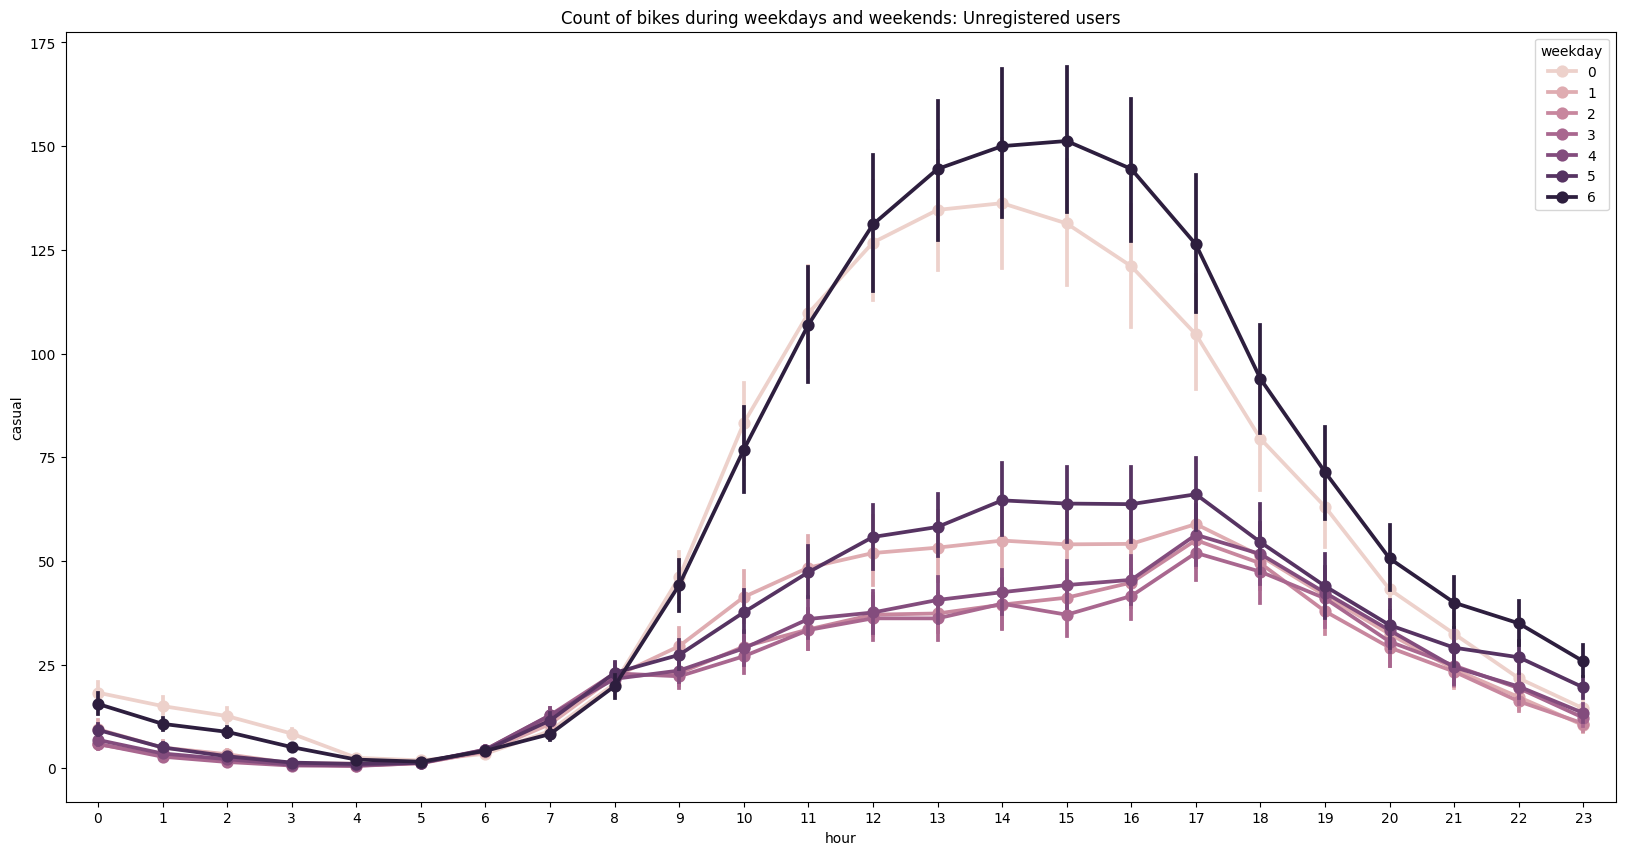

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_hourly_basis, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

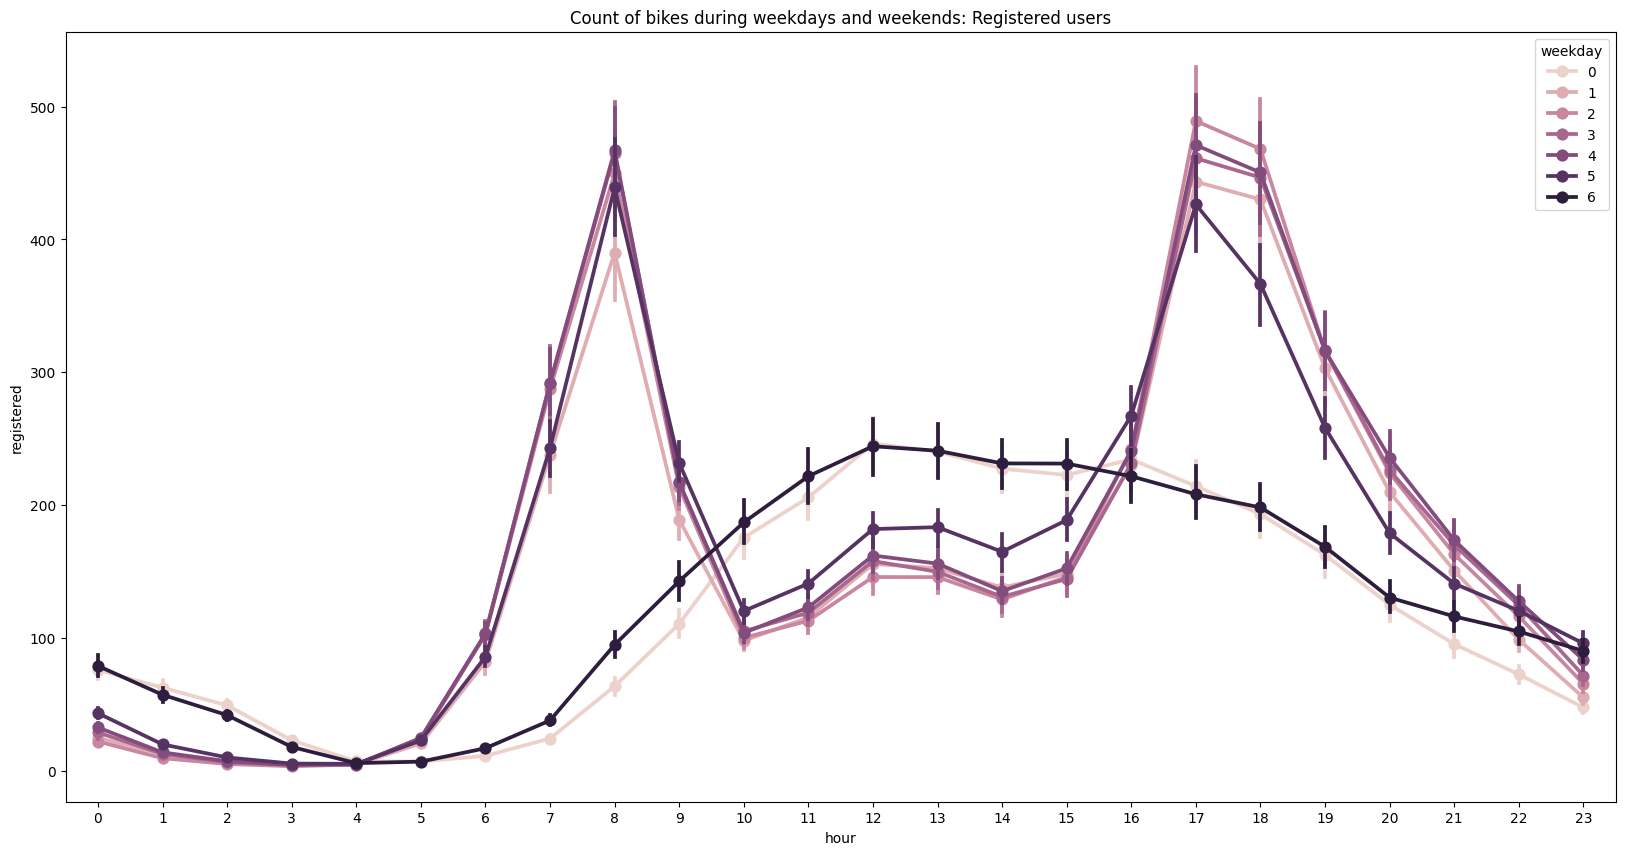

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_hourly_basis, x='hour', y='registered', hue='weekday', ax=ax)
#sns.pointplot(data=filtered_df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

#### Analyze the correlation between features with heatmap

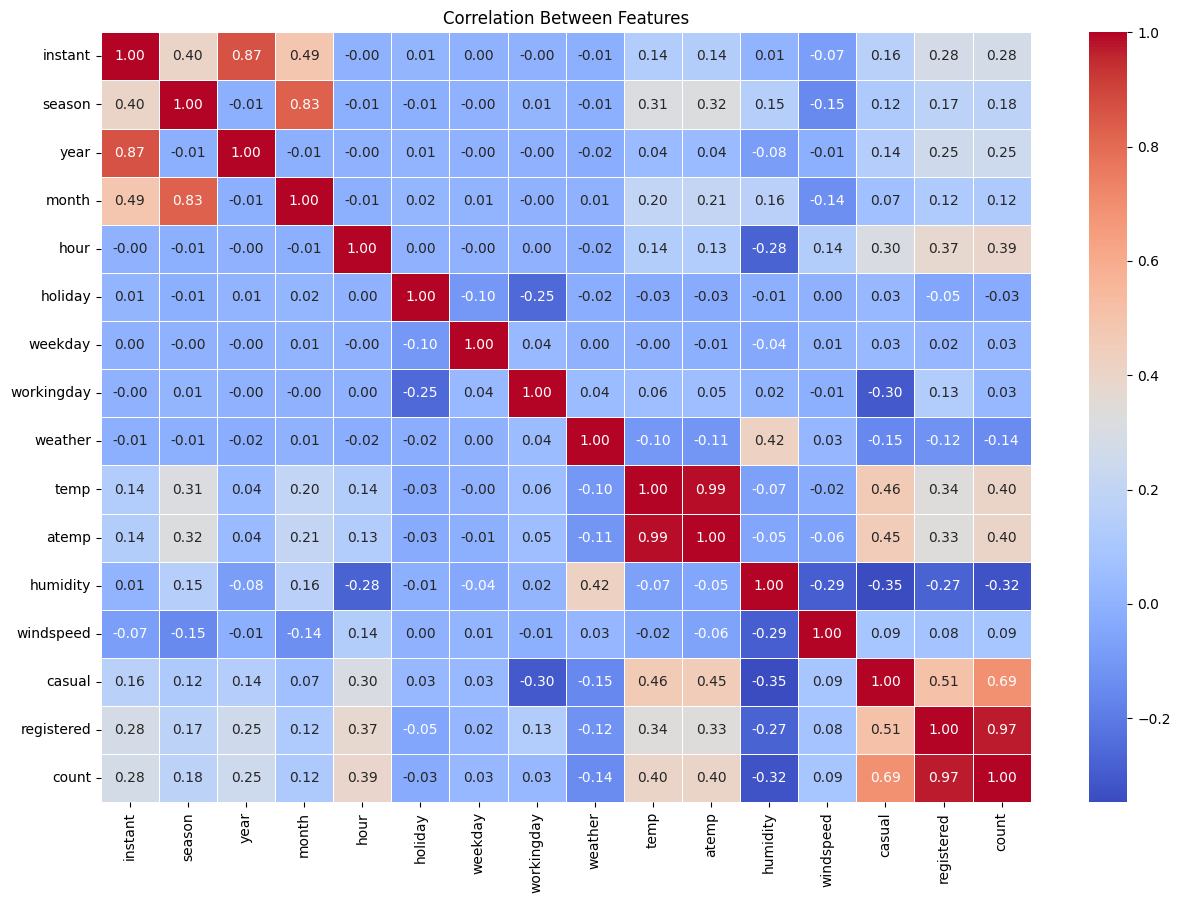

In [24]:
# YOUR CODE HERE
correMtr=df_hourly_basis.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correMtr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()

**Strong correlation of Features Humidity, Atemp, temp, weather, hour, season, month with the target ( Count of bikesharing )**

**Does it makes sense to consider correlation values from heatmap for categorical variables ?**

In [25]:
correMtr=df_hourly_basis.corr()['count'].sort_values()
print(correMtr)

humidity     -0.322911
weather      -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
month         0.120638
season        0.178056
year          0.250495
instant       0.278379
hour          0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
count         1.000000
Name: count, dtype: float64


#### Visualize the box plot of casual and registered variables to check the outliers

Text(0, 0.5, 'Registered')

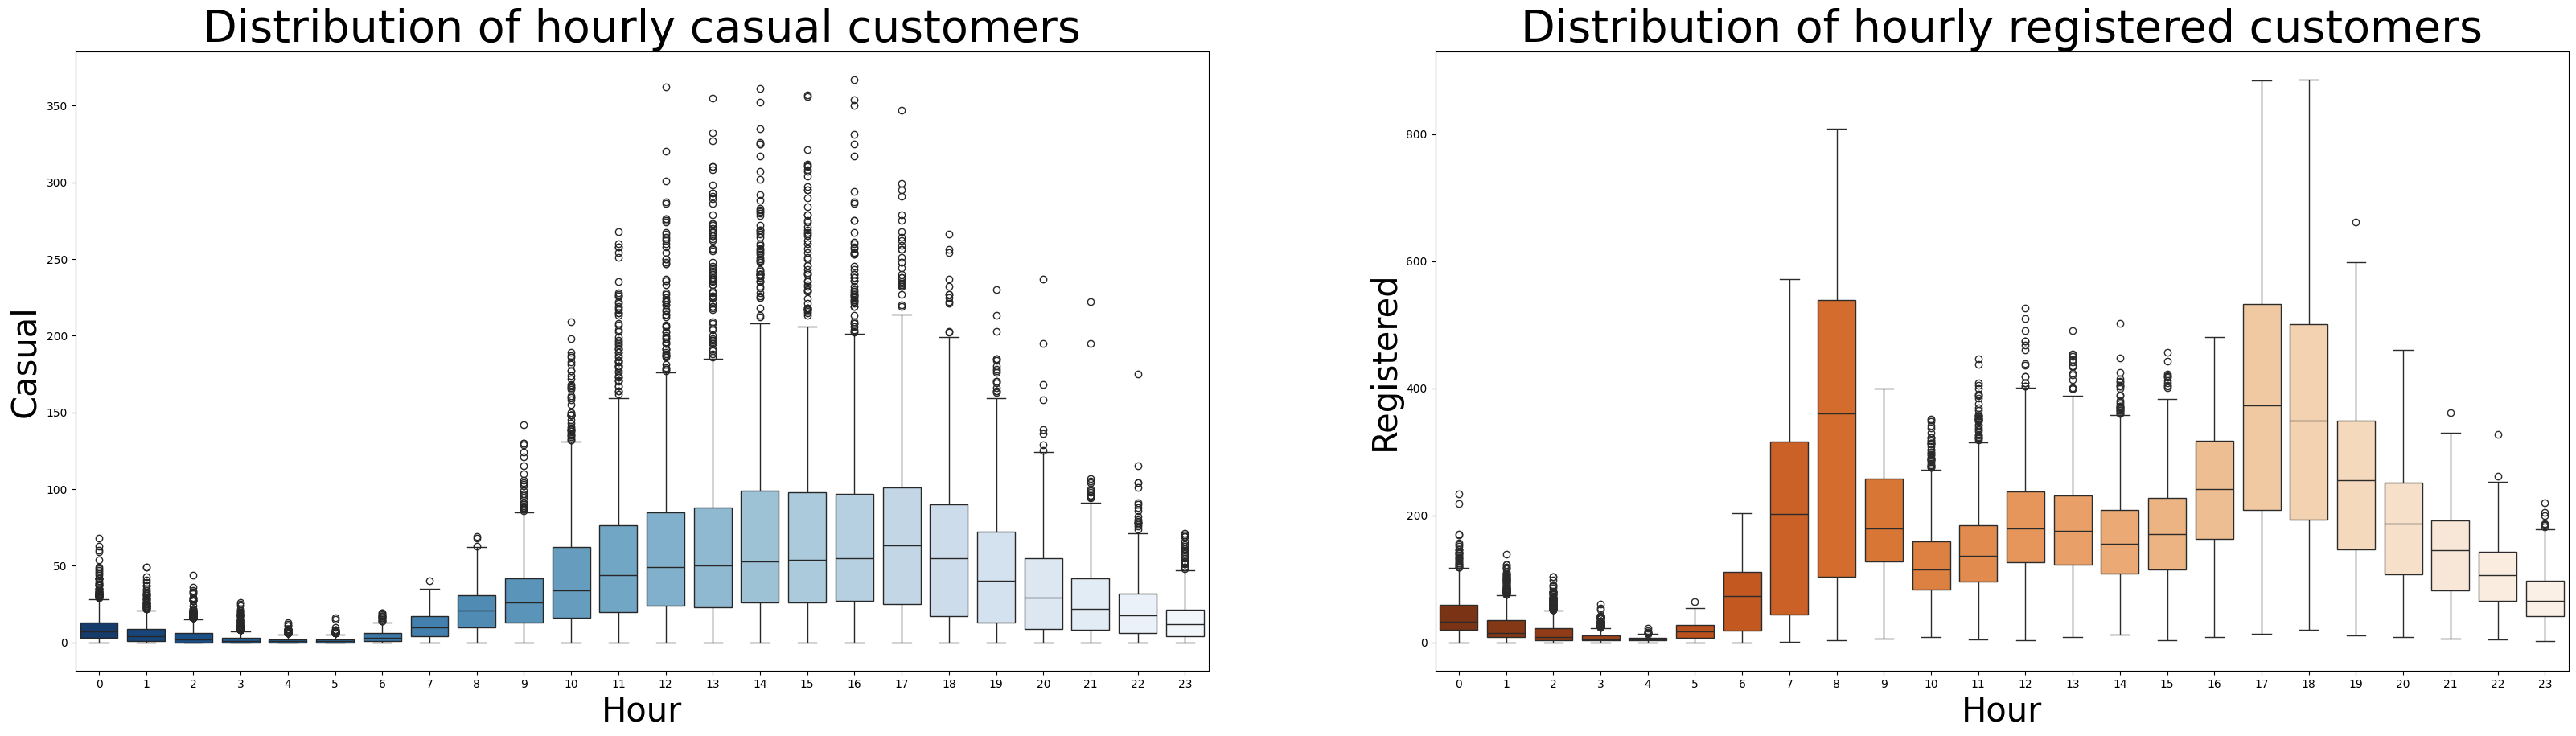

In [26]:
# Hourly distribution of casual vs registered
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(40,10))
sns.boxplot(x=df_hourly_basis['hour'], y=df_hourly_basis['casual'],data=df_hourly_basis,ax=ax1, palette='Blues_r')
#sns.boxplot(x=filtered_df['hour'], y=filtered_df['casual'],data=filtered_df,ax=ax1, palette='Blues_r')
ax1.set_title('Distribution of hourly casual customers', fontsize=40)
ax1.set_xlabel('Hour' , fontsize = 30)
ax1.set_ylabel('Casual' , fontsize = 30)
sns.boxplot(x=df_hourly_basis['hour'], y=df_hourly_basis['registered'],data=df_hourly_basis, ax=ax2, palette='Oranges_r')
#sns.boxplot(x=filtered_df['hour'], y=filtered_df['registered'],data=filtered_df, ax=ax2, palette='Oranges_r')
ax2.set_title('Distribution of hourly registered customers', fontsize=40)
ax2.set_xlabel('Hour' , fontsize = 30)
ax2.set_ylabel('Registered' , fontsize = 30)

Text(0, 0.5, 'Registered')

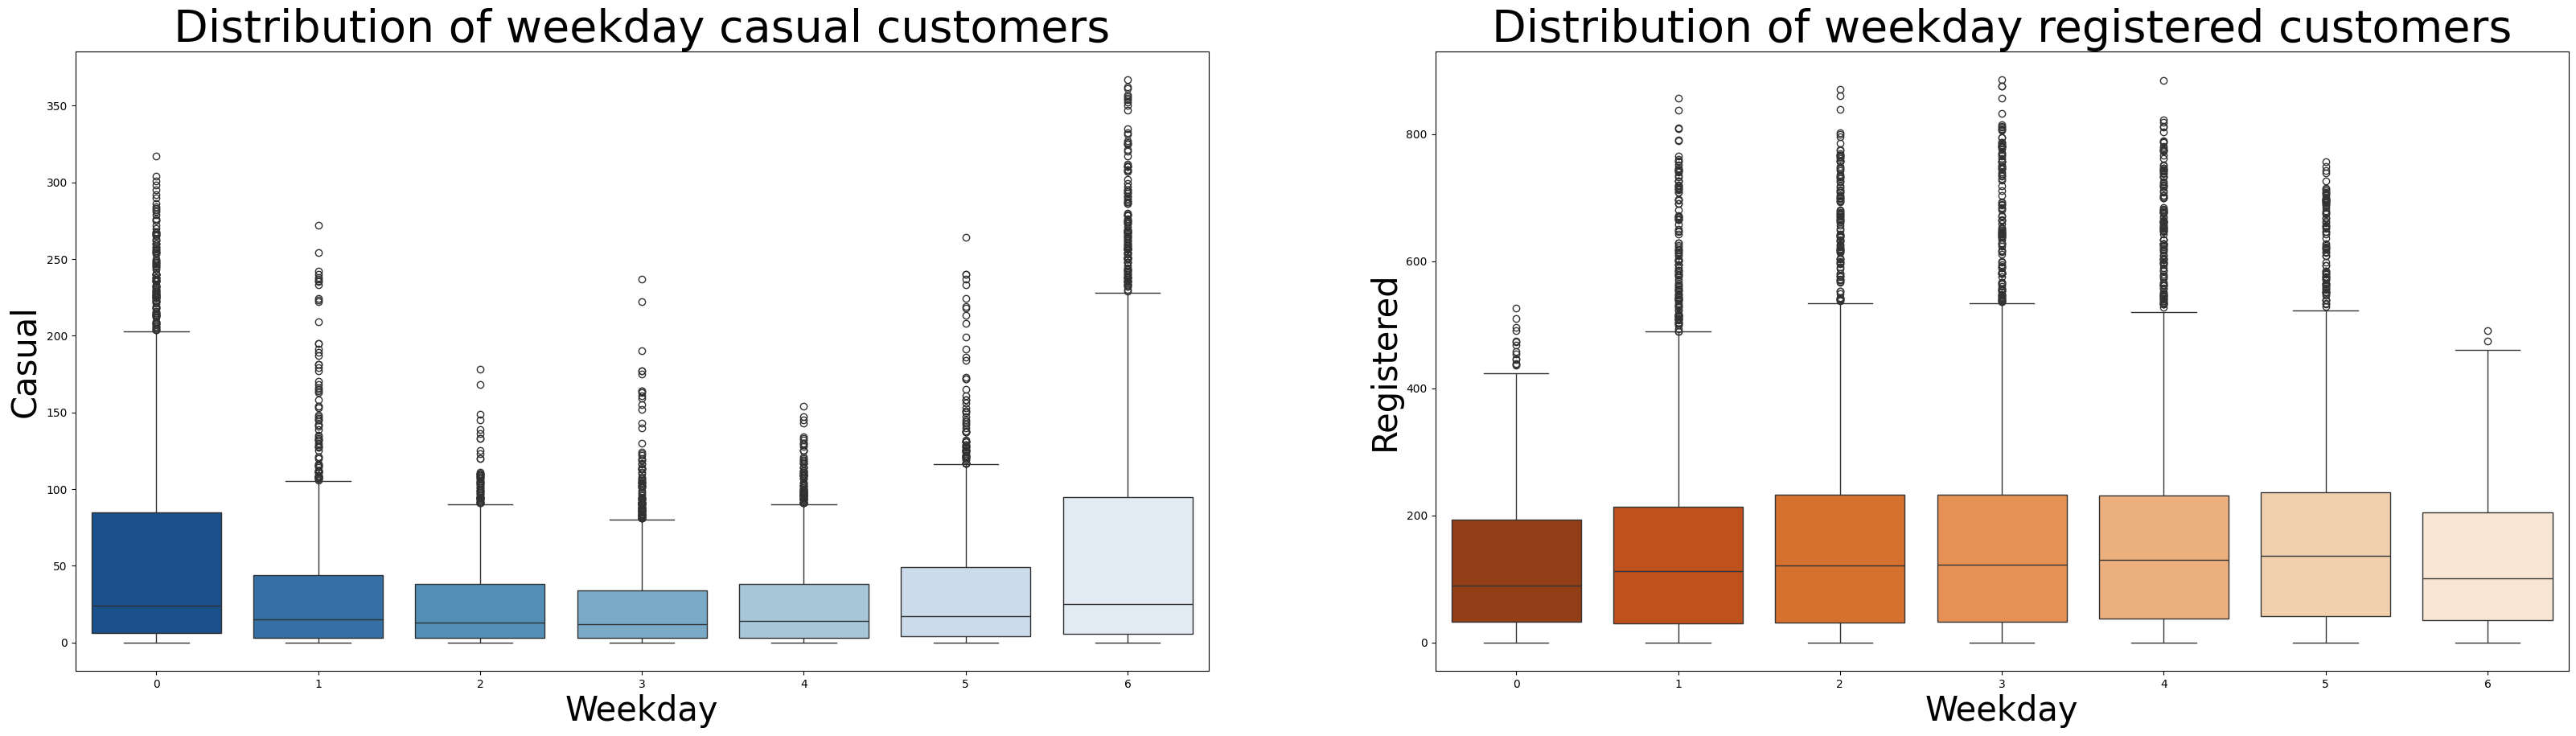

In [27]:
# Weekday distribution of casual vs registered
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(40,10))
sns.boxplot(x=df_hourly_basis["weekday"],y=df_hourly_basis["casual"],data=df_hourly_basis,ax=ax1,palette="Blues_r")
ax1.set_title("Distribution of weekday casual customers", fontsize=40)
ax1.set_xlabel("Weekday" , fontsize = 30)
ax1.set_ylabel("Casual" , fontsize = 30)
sns.boxplot(x=df_hourly_basis["weekday"], y=df_hourly_basis["registered"],data=df_hourly_basis, ax=ax2, palette="Oranges_r")
ax2.set_title("Distribution of weekday registered customers", fontsize=40)
ax2.set_xlabel("Weekday" , fontsize = 30)
ax2.set_ylabel("Registered" , fontsize = 30)

Text(0, 0.5, 'Registered')

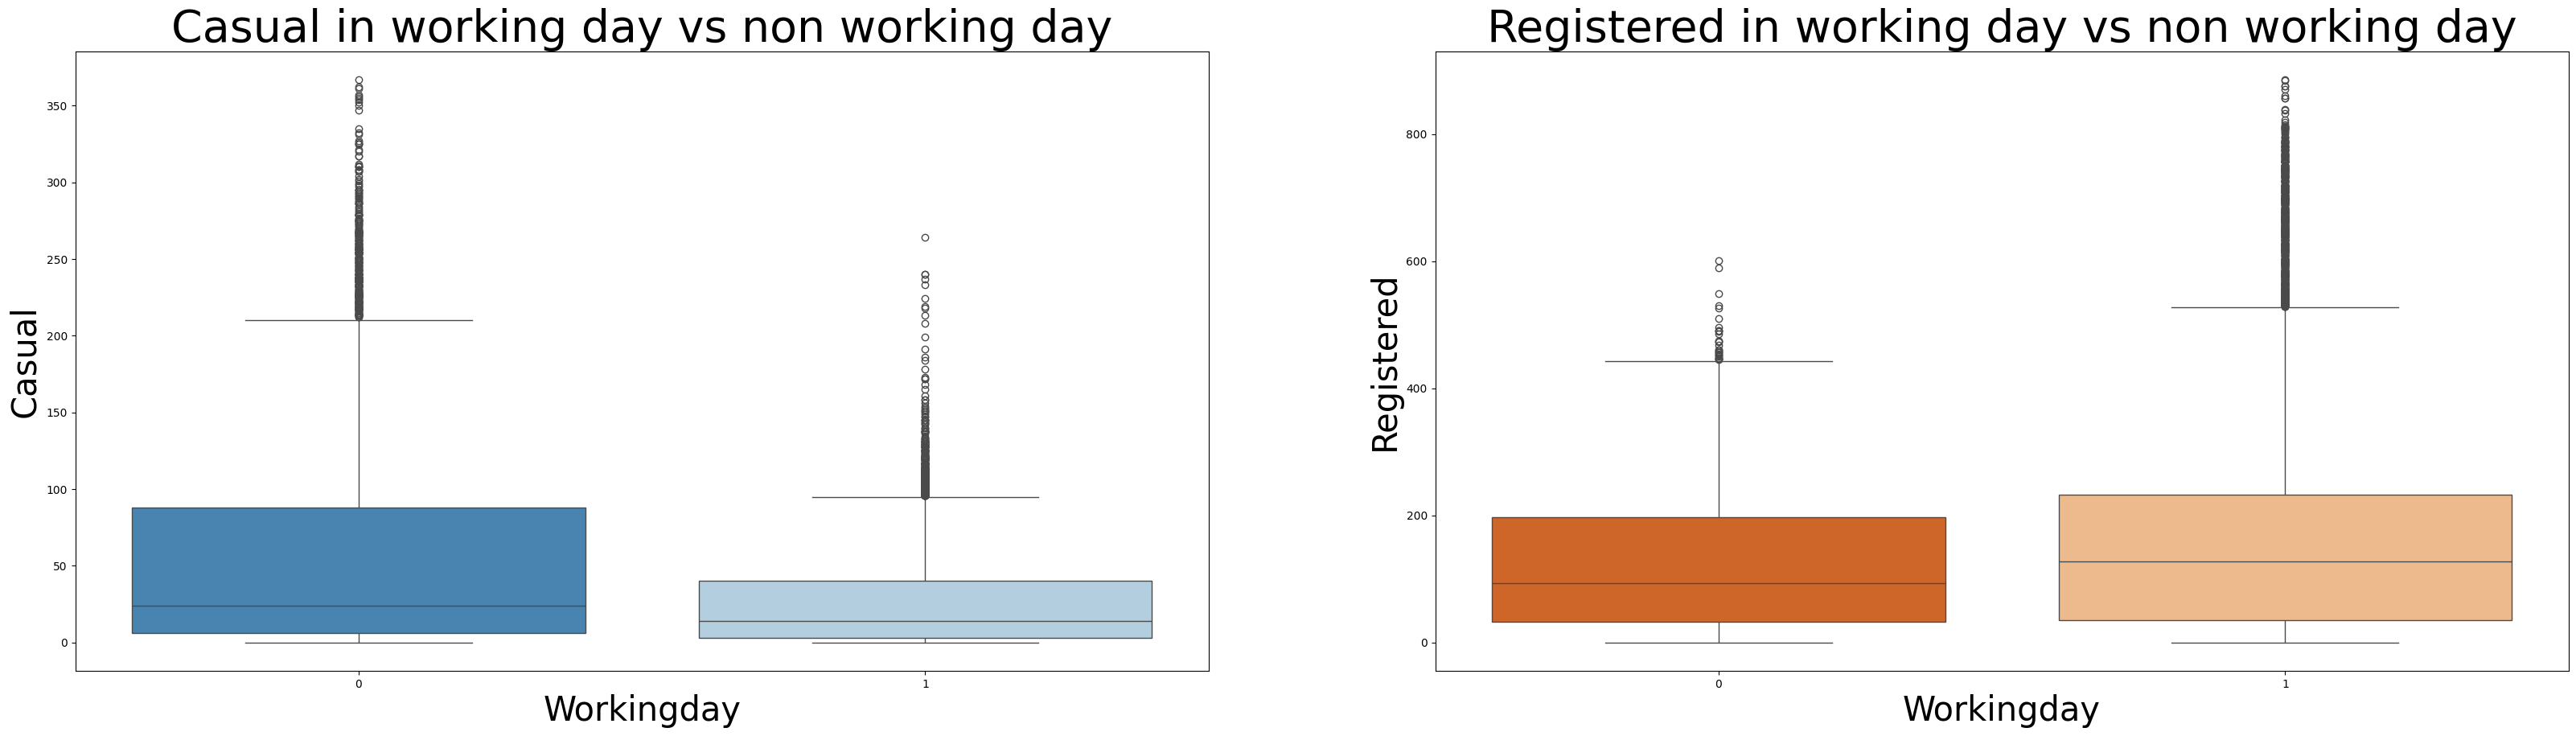

In [28]:
# Workingday vs non workingday distribution of casual vs registered
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(40,10))
sns.boxplot(x=df_hourly_basis['workingday'], y=df_hourly_basis['casual'],data=df_hourly_basis,ax=ax1, palette='Blues_r')
ax1.set_title('Casual in working day vs non working day',fontsize =40)
ax1.set_xlabel('Workingday' , fontsize = 30)
ax1.set_ylabel('Casual' , fontsize = 30)
sns.boxplot(x=df_hourly_basis['workingday'], y=df_hourly_basis['registered'],data=df_hourly_basis, ax=ax2, palette='Oranges_r')
ax2.set_title('Registered in working day vs non working day', fontsize =40)
ax2.set_xlabel('Workingday' , fontsize = 30)
ax2.set_ylabel('Registered' , fontsize = 30)

Samples in data set with outliers: 17379
Samples in train set without outliers: 16874


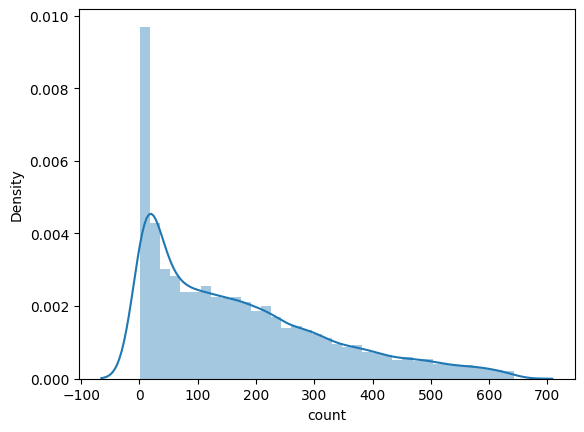

In [29]:
print("Samples in data set with outliers: {}".format(len(df_hourly_basis)))
q1 = df_hourly_basis['count'].quantile(0.25)
q3 = df_hourly_basis['count'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
df_hourly_basis_wo = df_hourly_basis.loc[(df_hourly_basis['count'] >= lower_bound) & (df_hourly_basis['count'] <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(df_hourly_basis_wo)))
sns.distplot(df_hourly_basis_wo['count']);

### Pre-processing and Data Engineering (1 point)

In [30]:
df_hourly_basis_wo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   date        16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   year        16874 non-null  int64         
 4   month       16874 non-null  int64         
 5   hour        16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weather     16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  humidity    16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  count       16874 non-

In [31]:
#columns = ['temp','atemp']
#df_hourly_basis_wo['mean_temp'] = df_hourly_basis_wo.apply(lambda row: row[columns].mean(), axis=1)

#### Drop unwanted columns

In [32]:
drop_cols = ['instant','date','temp']
#drop_cols = ['instant','date','temp','year','month','weekday','workingday','holiday','season']
df_model_train_test = df_hourly_basis_wo.drop(labels=drop_cols,axis=1)

#### Identify categorical and continuous variables


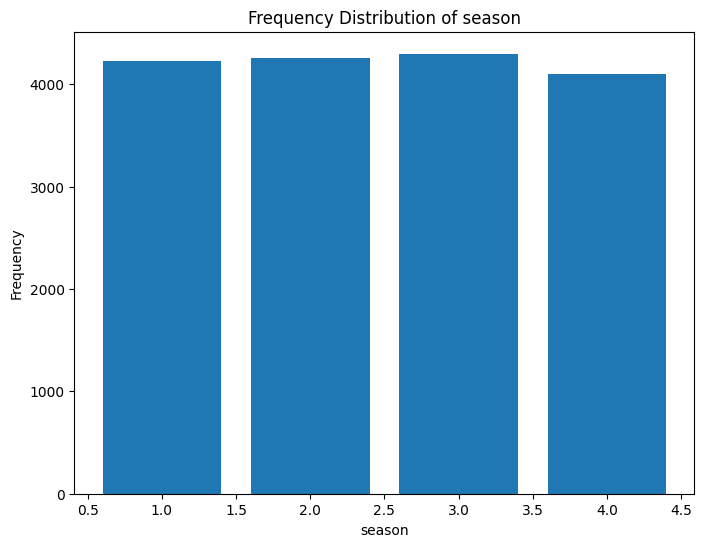

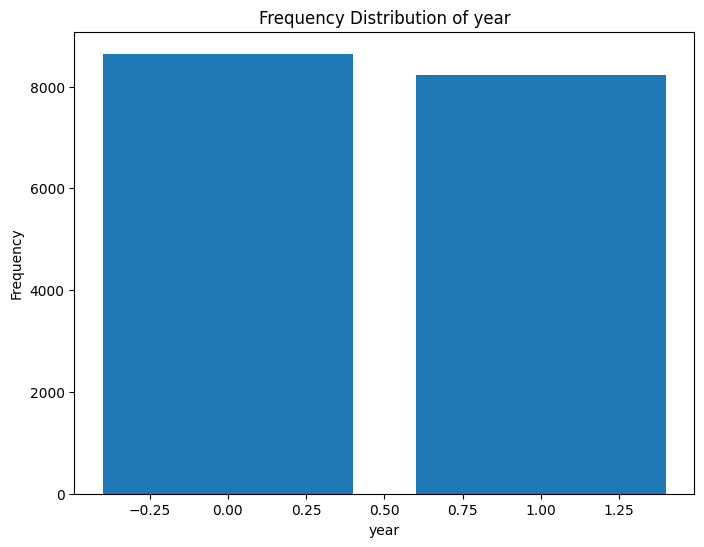

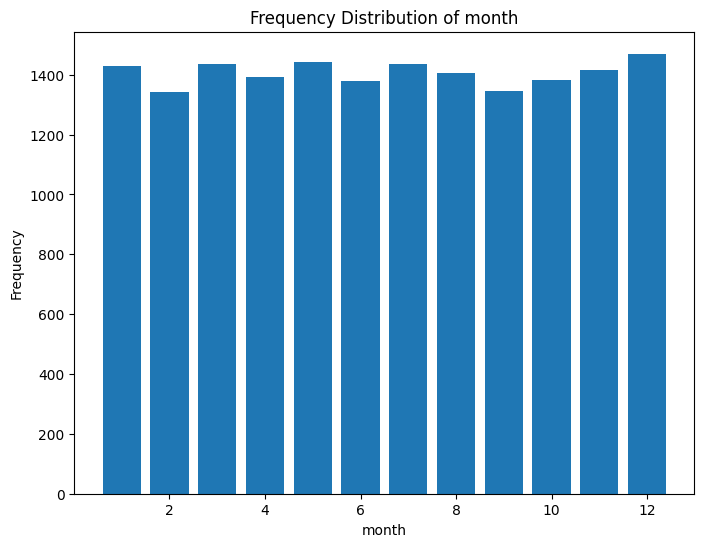

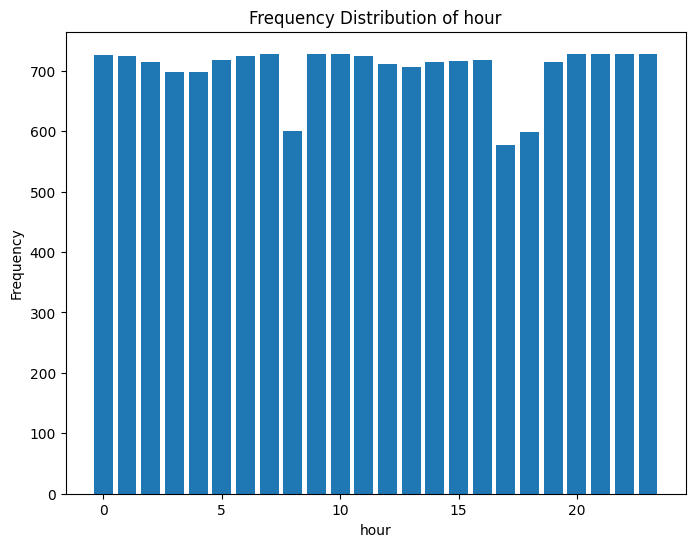

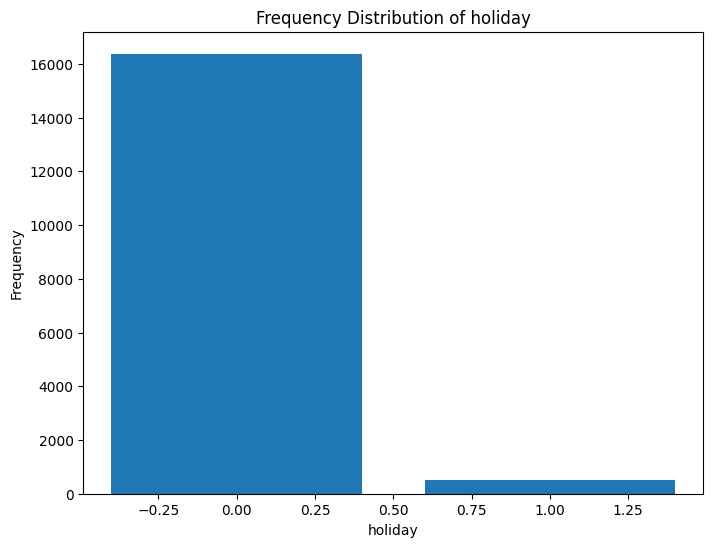

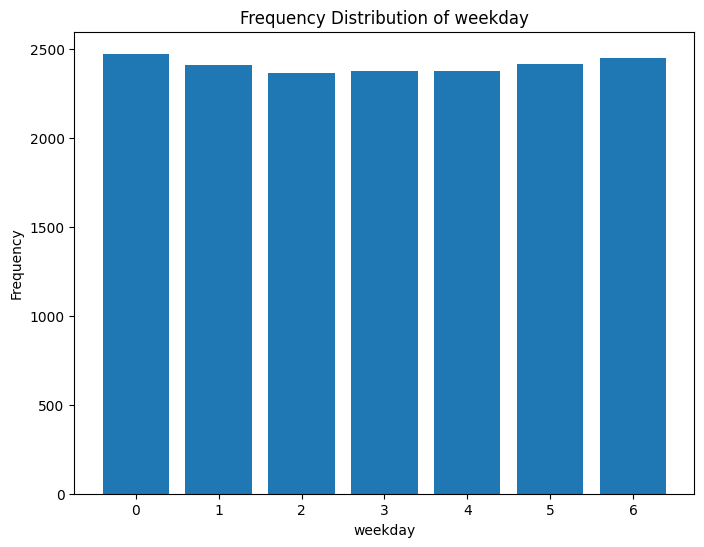

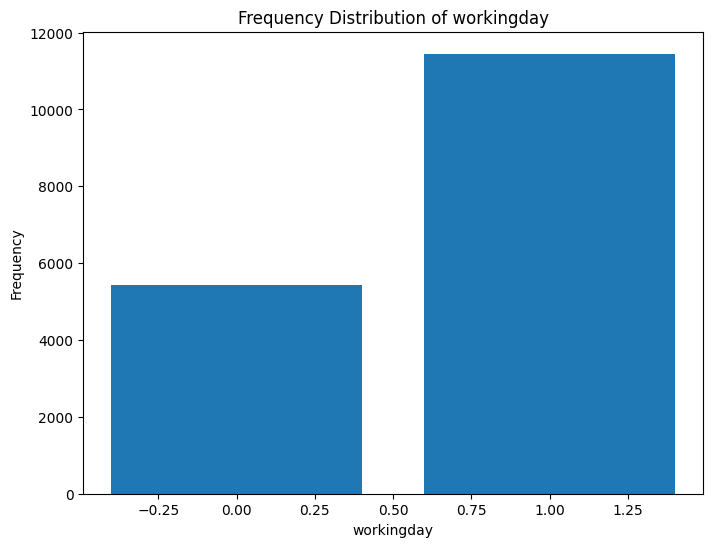

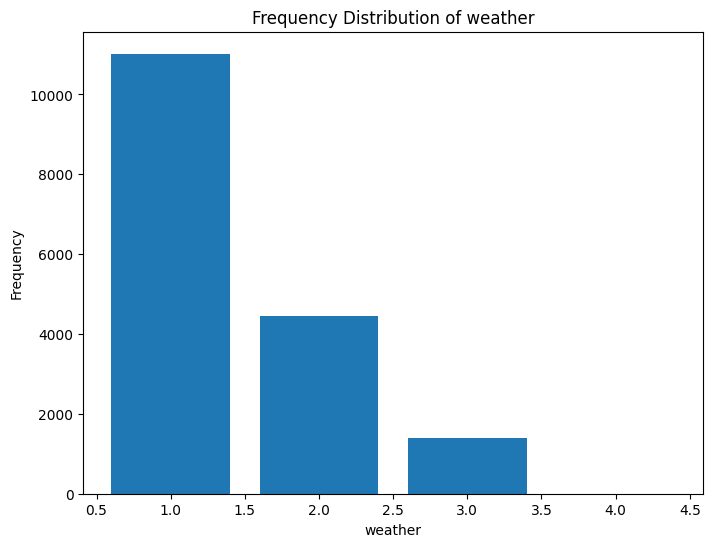

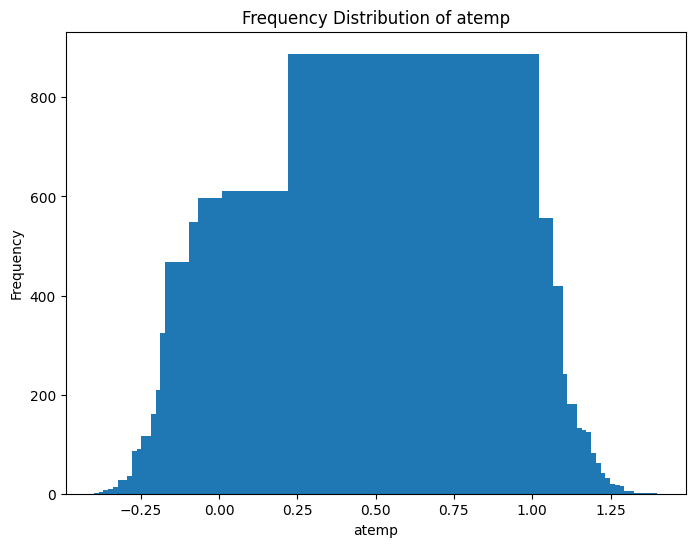

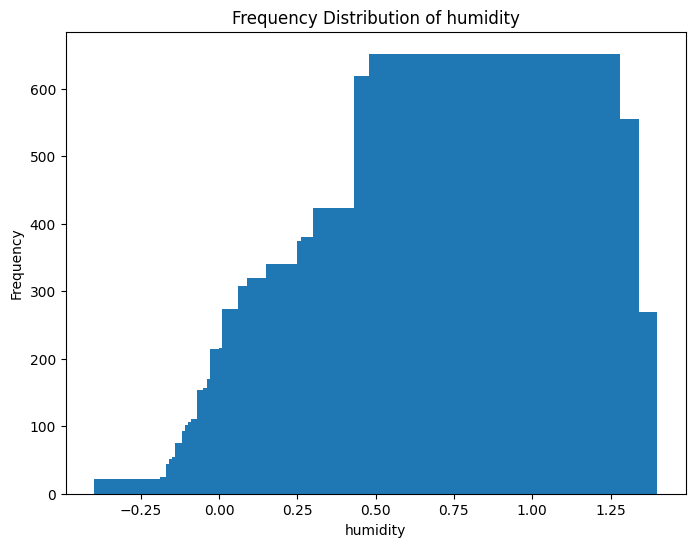

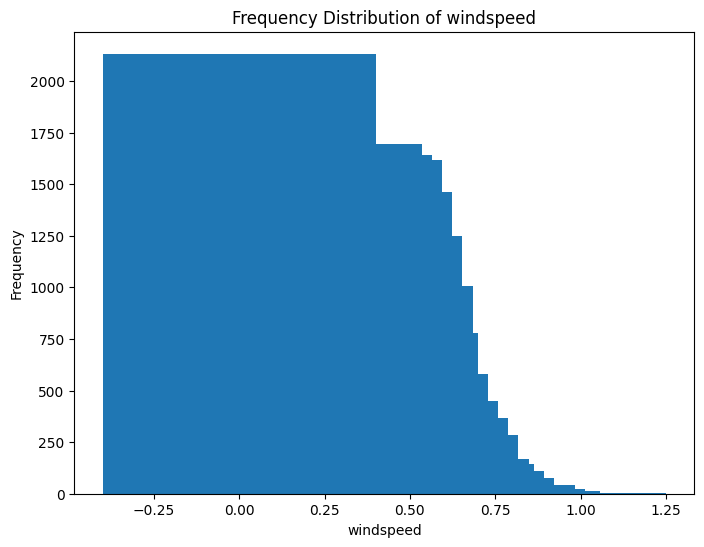

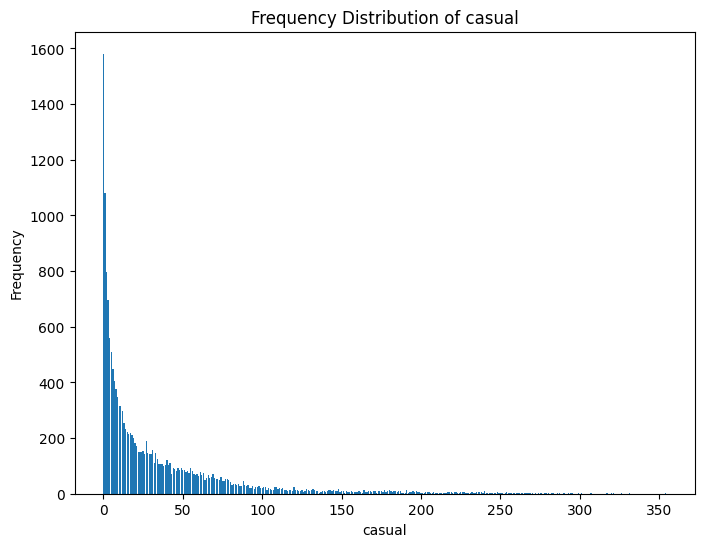

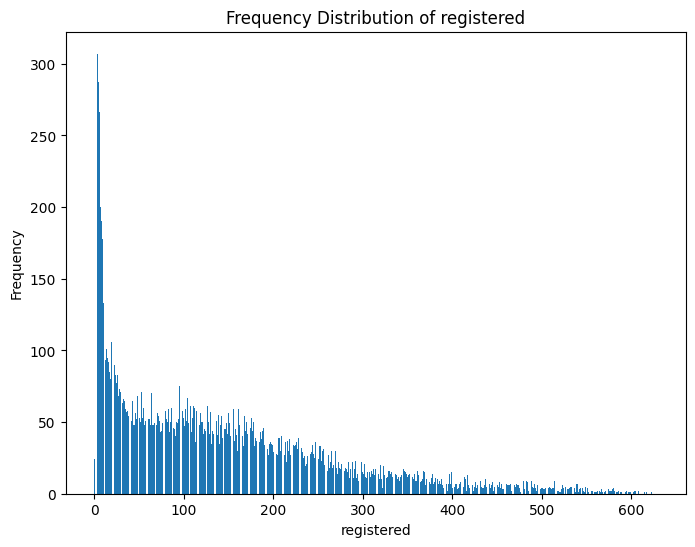

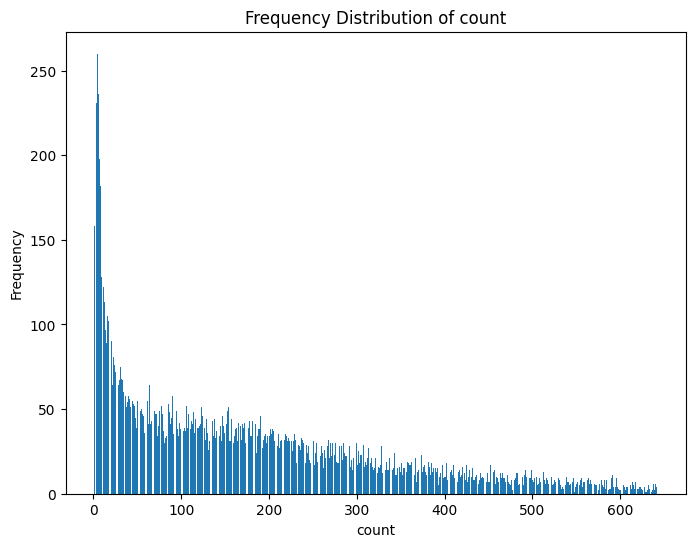

In [33]:
for col in df_model_train_test.columns:
    category_counts = df_model_train_test[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {col}')
    plt.show()

In [34]:
print("Data Types:")
print(df_model_train_test.dtypes)

# Identify unique value counts for each column
print("\nUnique Value Counts:")
for column in df_model_train_test.columns:
    unique_values = df_model_train_test[column].nunique()
    print(f"{column}: {unique_values} unique values")

# Identify categorical variables based on the number of unique values
categorical_variables = [column for column in df_model_train_test.columns if df_model_train_test[column].nunique() < 25]
print("\nCategorical Variables:", categorical_variables)

# Identify continuous variables based on the data type and number of unique values
continuous_variables = [column for column in df_model_train_test.columns if df_model_train_test[column].dtype != 'object' and column not in categorical_variables]
print("Continuous Variables:", continuous_variables)

Data Types:
season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Unique Value Counts:
season: 4 unique values
year: 2 unique values
month: 12 unique values
hour: 24 unique values
holiday: 2 unique values
weekday: 7 unique values
workingday: 2 unique values
weather: 4 unique values
atemp: 65 unique values
humidity: 89 unique values
windspeed: 30 unique values
casual: 293 unique values
registered: 598 unique values
count: 640 unique values

Categorical Variables: ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
Continuous Variables: ['atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [35]:
df_model_train_test.head()

,season,year,month,hour,holiday,weekday,workingday,weather,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0,1,1


In [36]:
continuous_features = ['atemp', 'humidity','windspeed','casual', 'registered', 'count']
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(df_model_train_test[continuous_features])
df_model_train_test[continuous_features] = scaler.transform(df_model_train_test[continuous_features])

In [37]:
df_model_train_test.head()

,season,year,month,hour,holiday,weekday,workingday,weather,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.0,0.008475,0.020668,0.023401
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.0,0.022599,0.050874,0.060842
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.0,0.014124,0.042925,0.048362
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.0,0.008475,0.015898,0.018721
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.0,0.000000,0.001590,0.000000


In [38]:
df_model_train_test['Sin_Hour'] = np.sin(2 * np.pi * df_model_train_test['hour'] / 24)
df_model_train_test['Cos_Hour'] = np.cos(2 * np.pi * df_model_train_test['hour'] / 24)
df_model_train_test.drop(columns='hour', axis=1, inplace=True)

#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [39]:
categorical_features = ['month','season', 'weather', 'weekday']
#categorical_features = ['weather']
ohe = OneHotEncoder(sparse=False, drop='first')
encoded_categorical_data = ohe.fit_transform(df_model_train_test[categorical_features])
encoded_df = df_model_train_test.drop(columns=categorical_features)
encoded_df = pd.concat([encoded_df, pd.DataFrame(encoded_categorical_data, columns=ohe.get_feature_names_out(categorical_features).tolist())], axis=1)

In [40]:
encoded_df.head()

,year,holiday,workingday,atemp,humidity,windspeed,casual,registered,count,Sin_Hour,...,season_4,weather_2,weather_3,weather_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.0,0.2879,0.81,0.0,0.008475,0.020668,0.023401,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.2727,0.80,0.0,0.022599,0.050874,0.060842,0.258819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.2727,0.80,0.0,0.014124,0.042925,0.048362,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.2879,0.75,0.0,0.008475,0.015898,0.018721,0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.2879,0.75,0.0,0.000000,0.001590,0.000000,0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
encoded_df.dropna(inplace=True)

#### Specify features and targets after applying scaling and one-hot encoding

In [42]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 0 to 16873
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        16374 non-null  float64
 1   holiday     16374 non-null  float64
 2   workingday  16374 non-null  float64
 3   atemp       16374 non-null  float64
 4   humidity    16374 non-null  float64
 5   windspeed   16374 non-null  float64
 6   casual      16374 non-null  float64
 7   registered  16374 non-null  float64
 8   count       16374 non-null  float64
 9   Sin_Hour    16374 non-null  float64
 10  Cos_Hour    16374 non-null  float64
 11  month_2     16374 non-null  float64
 12  month_3     16374 non-null  float64
 13  month_4     16374 non-null  float64
 14  month_5     16374 non-null  float64
 15  month_6     16374 non-null  float64
 16  month_7     16374 non-null  float64
 17  month_8     16374 non-null  float64
 18  month_9     16374 non-null  float64
 19  month_10    16374 non-nul

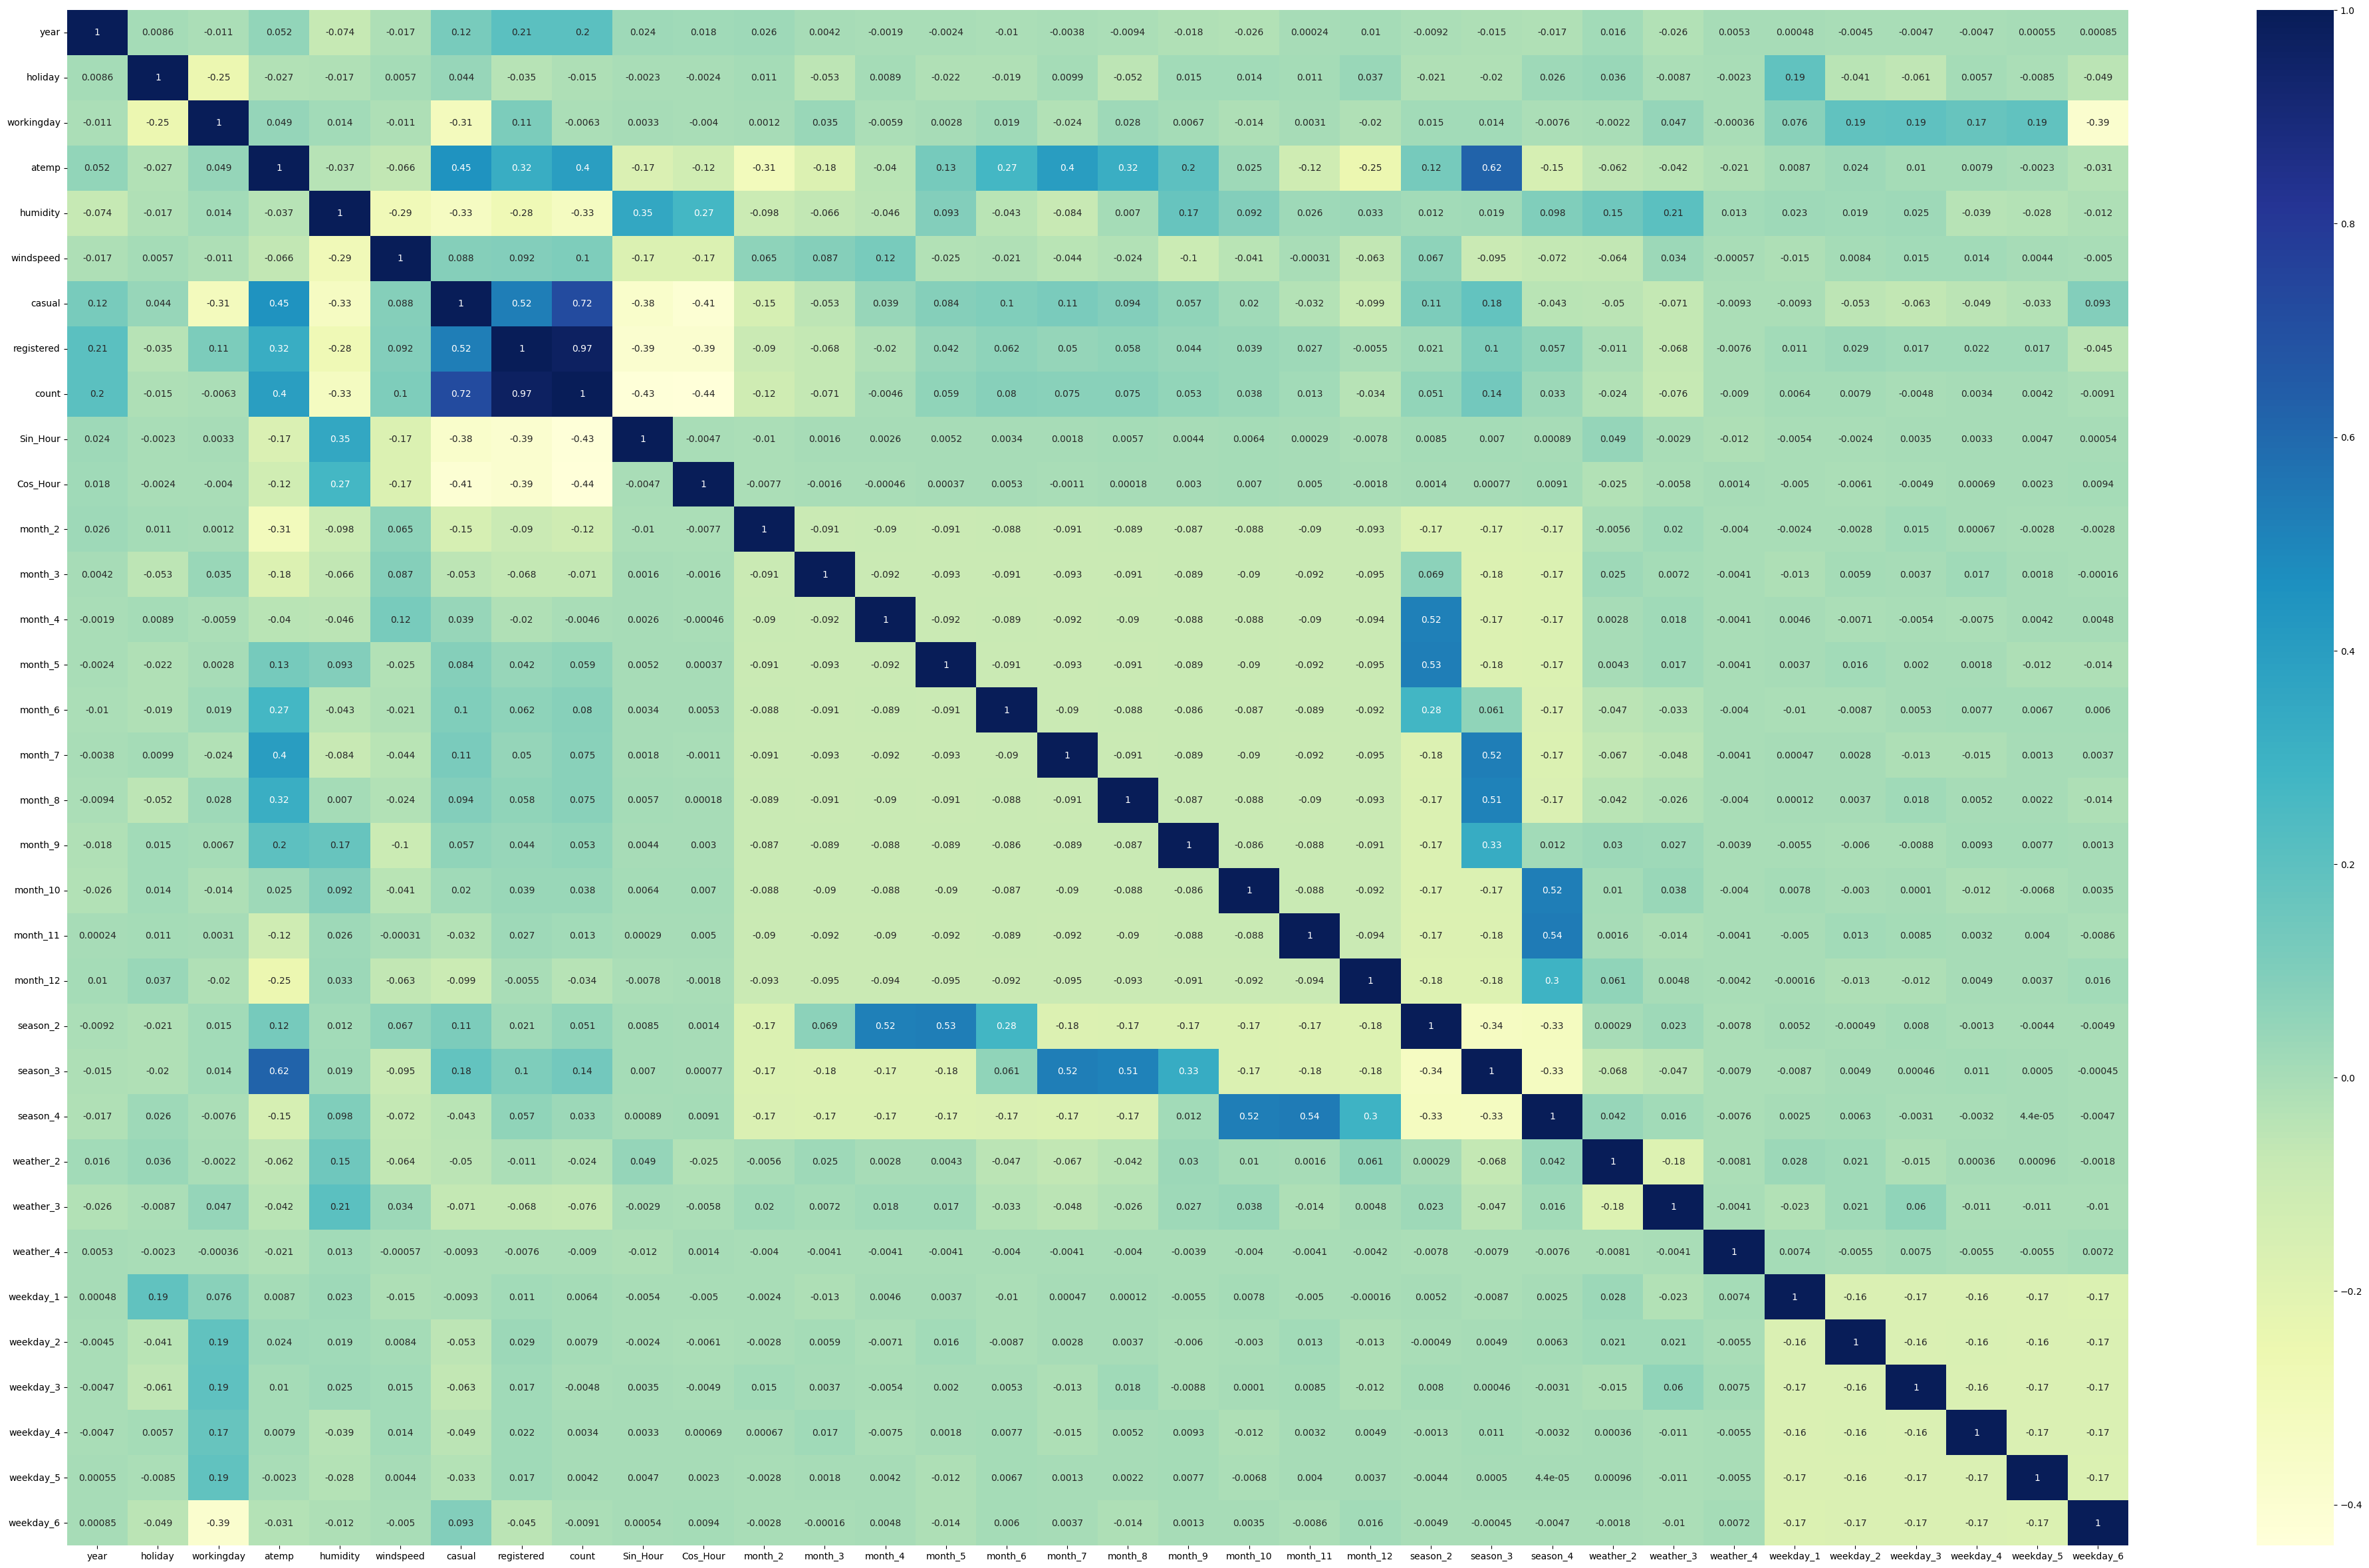

In [43]:
plt.figure(figsize=(50,30))
sns.heatmap(encoded_df.corr(),annot=True, cmap='YlGnBu')
plt.show()

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [44]:
columns_to_exclude = ['casual','registered','count']
df_model_features = encoded_df.loc[:, ~encoded_df.columns.isin(columns_to_exclude)]
df_model_target = encoded_df['count']

df_train_features, df_test_features, df_train_target, df_test_target = train_test_split(df_model_features, df_model_target, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set - Features:", df_train_features.shape, "Target:", df_train_target.shape)
print("Testing set - Features:", df_test_features.shape, "Target:", df_test_target.shape)

Training set - Features: (13099, 31) Target: (13099,)
Testing set - Features: (3275, 31) Target: (3275,)


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [45]:
import numpy as np
from scipy.linalg import lstsq
X_train_np = df_train_features.to_numpy()
y_train_np = df_train_target.to_numpy()

# Add bias term to the feature matrix (optional)
#X_train_with_bias = np.hstack((np.ones((X_train_np.shape[0], 1)), X_train_np))

# Compute the coefficients using the normal equation
theta, residuals, _, _ = lstsq(X_train_np, y_train_np)

# Print the coefficients
print("Coefficients:")
print(theta)

Coefficients:
[ 0.10586108 -0.03152526 -0.01834325  0.33494467 -0.04627969  0.00280413
 -0.13272411 -0.13944329  0.0354219   0.05172927  0.07427868  0.09943354
  0.07543116  0.03861116  0.05312521  0.0676844   0.08664404  0.07896105
  0.07714421  0.01506402  0.0295497   0.03843651 -0.00126369 -0.04948141
 -0.07667284  0.02848417  0.03029765  0.02726442  0.03301357  0.03384298
  0.01880859]


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [46]:
# Add bias term to the feature matrix (optional)
#X_train_with_bias = np.hstack((np.ones((X_train_np.shape[0], 1)), X_train_np))

# Initialize random coefficients
np.random.seed(42)  # For reproducibility
theta = np.random.randn(X_train_np.shape[1])

# Define learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent
for i in range(num_iterations):
    # Compute predictions
    y_pred = np.dot(X_train_np, theta)

    # Compute cost
    cost = np.mean((y_pred - y_train_np)**2)

    # Compute gradient
    gradient = 2 * np.dot(X_train_np.T, (y_pred - y_train_np)) / len(y_train_np)

    # Update coefficients
    theta -= learning_rate * gradient

    # Print cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost}")

# Print the final coefficients
print("Final Coefficients:")
print(theta)

Iteration 0: Cost = 3.132682996688507
Iteration 100: Cost = 0.9892528894958221
Iteration 200: Cost = 0.5043730246238926
Iteration 300: Cost = 0.3322668356112709
Iteration 400: Cost = 0.24547596341206462
Iteration 500: Cost = 0.1931393917461611
Iteration 600: Cost = 0.158805289353356
Iteration 700: Cost = 0.13518498118285863
Iteration 800: Cost = 0.11838258625696055
Iteration 900: Cost = 0.10609637407699228
Final Coefficients:
[ 5.84850251e-02 -9.08115179e-03  1.15215964e-01  1.61472727e+00
 -3.80663002e-02  1.00666566e-03 -7.32607355e-02 -1.03278858e-01
 -2.30190123e-01  2.66222467e-02  3.47242828e-02 -3.36927684e-02
 -3.73548136e-01 -1.58544166e+00 -1.49431283e+00 -1.00339978e+00
 -5.49834747e-01 -2.33051697e-01 -3.45491149e-01 -3.26430421e-01
  7.38516308e-01  1.75328852e-01 -4.62850925e-02 -3.25847245e-01
 -5.42859706e-01 -2.21020791e-01 -3.25671422e-01 -2.12590533e-01
 -3.03397319e-01 -2.60170055e-01 -1.57104102e-01]


#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [47]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
# Create and fit the SGDRegressor model
sgd_regressor = SGDRegressor(penalty=None, eta0=0.1)
sgd_regressor.fit(df_train_features, df_train_target)

# Predict on the test data
y_pred = sgd_regressor.predict(df_test_features)

print('Coefficients:',sgd_regressor.coef_)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df_test_target, y_pred)
print("Mean Squared Error (MSE):", mse)
# Calculate R^2 score
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

Coefficients: [ 0.092808   -0.03824232 -0.03663001  0.26727222 -0.10151565 -0.04253214
 -0.12194559 -0.14708474  0.01522988  0.03182766  0.05694315  0.0905696
  0.05483198  0.02375704  0.04474278  0.06526984  0.07677933  0.06763628
  0.05456445  0.01793505  0.0379422   0.03669857 -0.01222046 -0.04196637
 -0.01198876  0.00144468  0.02693848  0.02941267  0.00373322  0.01392557
  0.01370229]
Mean Squared Error (MSE): 0.02859868696799178
R^2 Score: 0.5017165661087646


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and fit the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(df_train_features,df_train_target)
# Predict on the test data
y_pred = linear_regressor.predict(df_test_features)
print('Coefficients:',linear_regressor.coef_)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df_test_target, y_pred)
print("Mean Squared Error (MSE):", mse)

Coefficients: [ 0.10149171 -0.03703041 -0.02188138  0.25993093 -0.10524599 -0.04169489
 -0.13166123 -0.13877803  0.01429859  0.03736598  0.06580337  0.10005138
  0.07794437  0.04379257  0.05942831  0.07468702  0.08875996  0.07420804
  0.06431803  0.01690224  0.03150138  0.03390704 -0.0006472  -0.04316865
 -0.08787141  0.01703043  0.01935674  0.01650068  0.02052346  0.02137716
  0.00319121]
Mean Squared Error (MSE): 0.027628593805374874


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [49]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.5186187879766486


***Trying out some other Ensemble ML Models which yield better results i.e. lower MSE and higher R2***

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)
rf.fit(df_train_features,df_train_target)
y_pred = rf.predict(df_test_features)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df_test_target, y_pred)
print("Mean Squared Error (MSE):", mse)
# Calculate R^2 score
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 0.004790046217230853
R^2 Score: 0.9165415992597539


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
print('\n====== GradientBoostingRegressor =====')
gbr.fit(df_train_features,df_train_target)
y_pred = gbr.predict(df_test_features)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df_test_target, y_pred)
print("Mean Squared Error (MSE):", mse)
# Calculate R^2 score
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)


====== GradientBoostingRegressor =====
Mean Squared Error (MSE): 0.009389426912317622
R^2 Score: 0.8364052206530747


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

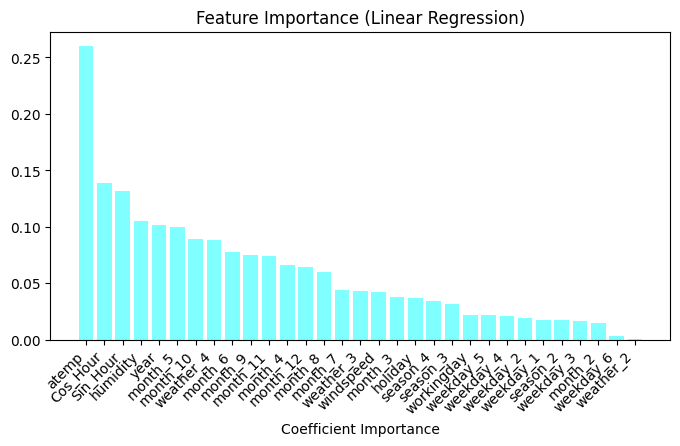

In [52]:
import matplotlib.pyplot as plt

# Get the coefficients from the linear regression model
coefficients = linear_regressor.coef_

# Get the names of the features
feature_names = df_train_features.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': abs(coefficients)})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
# Plot feature importances
plt.figure(figsize=(8, 4))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='cyan', alpha=0.5)
plt.xlabel("Coefficient Importance")
plt.title("Feature Importance (Linear Regression)")
plt.xticks(rotation=45, ha='right')
plt.show()

***Based on the above Plot, factors such as Humidity, Temperature, Hour of a Day and Weather are the most significant factors***

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [53]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [54]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {'alpha': alpha}
# Create Lasso regression model
lasso_model = Lasso()
gscv = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
gscv.fit(df_train_features, df_train_target)

# Get the best alpha and best model
best_alpha = gscv.best_params_['alpha']
best_lasso_model = gscv.best_estimator_

# Fit the best model on the training data
best_lasso_model.fit(df_train_features, df_train_target)

# Predict on the test data
y_pred = best_lasso_model.predict(df_test_features)

# Calculate metrics for the actual and predicted values
mse = mean_squared_error(df_test_target, y_pred)
r2 = r2_score(df_test_target, y_pred)

print("Best Alpha:", best_alpha)
print('Coefficients:',best_lasso_model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Best Alpha: 0.0001
Coefficients: [ 0.1001985  -0.03059885 -0.01777084  0.28830185 -0.09985512 -0.03394666
 -0.13028932 -0.13776751  0.          0.01544123  0.03245442  0.06425355
  0.03837514  0.          0.01606489  0.03344692  0.05355675  0.04172717
  0.03900786  0.03083281  0.0501256   0.04847518 -0.00051443 -0.04245891
 -0.          0.00946022  0.01183936  0.00928777  0.01341946  0.01461538
 -0.        ]
Mean Squared Error (MSE): 0.027672306309744703
R^2 Score: 0.5178571720043572


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create Ridge regression model
ridge_model = Ridge()

# Perform grid search cross-validation to find the best alpha
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df_train_features, df_train_target)

# Get the best alpha and best model
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

# Fit the best model on the training data
best_ridge_model.fit(df_train_features, df_train_target)

# Predict on the test data
y_pred = best_ridge_model.predict(df_test_features)

# Calculate metrics for the actual and predicted values
mse = mean_squared_error(df_test_target, y_pred)
r2 = r2_score(df_test_target, y_pred)

print("Best Alpha:", best_alpha)
print('Coefficients:',best_ridge_model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Best Alpha: 1
Coefficients: [ 0.10147286 -0.03688754 -0.02181235  0.25940416 -0.10489818 -0.04146535
 -0.13167761 -0.13878874  0.01376795  0.03646324  0.06422416  0.09848259
  0.07634675  0.04205198  0.05763466  0.07291036  0.08722211  0.07265511
  0.06309639  0.01796976  0.03290243  0.03491567 -0.00067311 -0.0431841
 -0.06638157  0.0169015   0.01924513  0.01638814  0.02042575  0.02129131
  0.00313612]
Mean Squared Error (MSE): 0.027630388734105542
R^2 Score: 0.5185875143992109


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define a list of l1_ratio values to try
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Create a dictionary of parameters to search
param_grid = {'alpha': alpha, 'l1_ratio': l1_ratios}

# Create ElasticNet regression model
elasticnet_model = ElasticNet(max_iter=10000)

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df_train_features, df_train_target)

# Get the best parameters and best model
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_elasticnet_model = grid_search.best_estimator_

# Fit the best model on the training data
best_elasticnet_model.fit(df_train_features, df_train_target)

# Predict on the test data
y_pred = best_elasticnet_model.predict(df_test_features)

# Calculate metrics for the actual and predicted values
mse = mean_squared_error(df_test_target, y_pred)
r2 = r2_score(df_test_target, y_pred)

print("Best Alpha:", best_alpha)
print("Best L1 Ratio:", best_l1_ratio)
print('Coefficients:',best_elasticnet_model.coef_)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Best Alpha: 0.0001
Best L1 Ratio: 0.1
Coefficients: [ 0.10132528 -0.03622707 -0.02139384  0.26239864 -0.10437998 -0.040649
 -0.13151782 -0.13867542  0.01220115  0.03404984  0.06047869  0.09447607
  0.07190576  0.03702352  0.05271524  0.0682649   0.08334607  0.0690689
  0.06031412  0.01963005  0.03518283  0.0365828  -0.00065344 -0.04309501
 -0.03294439  0.01604212  0.01840274  0.01556597  0.01962482  0.02053302
  0.00265789]
Mean Squared Error (MSE): 0.027632820601071063
R^2 Score: 0.5185451432573573


In [57]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
columns_to_exclude = ['casual','registered','count']
X_poly = poly.fit_transform(df_model_train_test.loc[:, ~df_model_train_test.columns.isin(columns_to_exclude)])
# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly,df_model_train_test['count'] )

# Make predictions
y_pred = model.predict(X_poly)
print('Coefficients:',model.coef_)
# Evaluate model performance (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(df_model_train_test['count'], y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(df_model_train_test['count'], y_pred)
print("R^2 Score:", r2)

Coefficients: [ 2.87463099e-15  8.90937338e-02  5.42205717e-02  1.18736144e-02
 -6.55853325e-02 -4.19542624e-03 -2.30830069e-03  1.12529630e-01
  1.00919333e+00  3.80710193e-01  2.44098344e-01 -5.15633140e-02
 -1.00483783e-01 -8.21973773e-03  8.41188403e-03  4.88936599e-04
  1.69041349e-02  4.22444596e-04 -7.44964403e-03 -8.94178797e-03
 -6.42584362e-02  1.60128183e-02 -6.57000906e-03 -1.86148893e-02
 -1.62589721e-02  5.42205717e-02 -4.22115529e-03 -1.68051163e-02
  4.07873725e-03 -8.71631441e-03 -1.60502846e-02 -1.48049304e-03
  2.46821055e-02 -6.58024620e-03 -4.96875743e-02 -6.82505747e-02
 -1.54839100e-03 -4.33599494e-03 -1.70479174e-04  3.06416376e-03
  2.08447634e-03  2.53373471e-02 -8.26419700e-03  3.97552945e-03
  2.33865363e-03  9.87710133e-04 -6.55853325e-02 -1.83630995e-02
  2.49800181e-16  3.02395567e-02  4.77609505e-02  9.11744850e-02
  1.18209684e-01  2.88768246e-02  2.85242525e-02  1.00339502e-03
  1.27490539e-03  5.98371188e-04  5.79819373e-03 -4.54497522e-03
 -4.4700819

In [58]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_train_features)
# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly,df_train_target)
X_poly = poly.fit_transform(df_test_features)
# Make predictions
y_pred = model.predict(X_poly)
print('Coefficients:',model.coef_)
# Evaluate model performance (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(df_test_target, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

Coefficients: [-1.84070583e+08 -6.99185562e+11 -5.15697883e+10 -1.10408703e+12
  4.80741516e-01  2.94167132e-01  3.58606266e-01 -7.23793692e-02
 -9.98574535e-02  3.78032155e+10 -1.36334699e+11  2.88313307e+11
 -1.15569705e+10  1.32641777e+11 -6.63012877e+10  4.22377462e+10
 -2.07867161e+10 -1.51403922e+11 -3.29623818e+11  1.88720211e+10
  4.23856666e+11  1.52607740e+11  9.25331067e+09 -2.27231085e+11
  4.94887352e+10  4.04877769e+10  2.37779282e+11 -3.87471496e+10
  3.11789832e+11 -6.36837479e+11 -1.77974196e+12 -1.38283575e+12
  6.99185562e+11 -2.55775452e-03  3.69262695e-03  1.52740479e-01
 -4.89501953e-02 -3.85341644e-02 -3.75061035e-02 -6.13403320e-02
 -5.85937500e-03  1.49364471e-02 -4.76074219e-03 -6.22558594e-02
 -7.66601562e-02 -4.72412109e-02 -1.37023926e-02 -4.14505005e-02
  6.10656738e-02  8.77974033e-02  6.33850098e-02 -1.58691406e-02
 -4.81567383e-02 -1.08734131e-01  8.16345215e-03  9.96780396e-03
  9.08504074e+09  5.24902344e-03 -8.08715820e-03 -1.90734863e-03
 -2.8991699

Why using Scaled Features shows no improvement in polynomial regression ?

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [59]:
columns_to_exclude = ['casual','registered','count']
df_model_features = encoded_df.loc[:, ~encoded_df.columns.isin(columns_to_exclude)]
df_model_target = encoded_df[['casual','registered']]
df_train_features, df_test_features, df_train_target, df_test_target = train_test_split(df_model_features, df_model_target, test_size=0.2, random_state=42)
linear_regressor.fit(df_train_features,df_train_target)
# Predict on the test data
y_pred = linear_regressor.predict(df_test_features)
print('Coefficients:',linear_regressor.coef_)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df_test_target, y_pred)
print("Mean Squared Error (MSE):", mse)
# Calculate R^2 score
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

Coefficients: [[ 0.02914103 -0.04717759 -0.10934753  0.24265505 -0.09741094 -0.03627703
  -0.05316173 -0.06324119 -0.00127227  0.02533803  0.02808438  0.03076985
   0.01054477 -0.00731179  0.00589648  0.02016045  0.03278397  0.02268948
   0.00941173  0.02172074  0.02001406  0.0093831  -0.00272926 -0.007275
  -0.01680801  0.02478432  0.01893978  0.01850908  0.01756498  0.02779689
  -0.00043442]
 [ 0.08702744 -0.01118541  0.03924175  0.12832407 -0.05243117 -0.0220737
  -0.10425373 -0.1058336   0.01528741  0.02381865  0.05125293  0.08464293
   0.07349681  0.04874311  0.05724355  0.06476562  0.07200256  0.06285417
   0.06024818  0.00500031  0.02083848  0.02927312  0.00087647 -0.03989786
  -0.0800883   0.00340676  0.00906675  0.0063986   0.01102946  0.00614096
   0.00349658]]
Mean Squared Error (MSE): 0.014961656567657008
R^2 Score: 0.5020099592874847


**There is a reduction in error when we use two target variables because there exists strong correlation between the target variables Casual and Registered**

In [60]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
columns_to_exclude = ['casual','registered','count']
X_poly = poly.fit_transform(df_model_train_test.loc[:, ~df_model_train_test.columns.isin(columns_to_exclude)])
# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly,df_model_train_test[['casual','registered']] )

# Make predictions
y_pred = model.predict(X_poly)
print('Coefficients:',model.coef_)
# Evaluate model performance (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(df_model_train_test[['casual','registered']], y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(df_model_train_test[['casual','registered']], y_pred)
print("R^2 Score:", r2)

Coefficients: [[ 1.69225019e-15  6.76918814e-02  1.00239446e-02  6.34946276e-03
   1.40510856e-03 -1.84975524e-02 -5.66753597e-03  3.20482386e-02
   6.96397947e-01  2.08184494e-01  1.52159480e-01 -8.19419531e-03
  -7.24449644e-02 -2.30356238e-03 -6.92926992e-03 -2.98414380e-03
  -3.94439391e-03  2.04569869e-03 -9.61011885e-03 -5.71698829e-03
  -2.76709405e-02 -4.09839533e-03  4.75806290e-03 -3.41510207e-03
  -5.28461745e-03  1.00239446e-02  1.76565786e-03 -2.00279418e-02
   2.69433729e-03 -2.56426611e-02 -2.69086976e-03  7.63482303e-02
  -1.33747835e-02 -2.32947382e-03 -1.57512564e-02 -2.98049051e-02
  -8.08300496e-04  1.56129364e-03 -2.98385562e-04  3.11943715e-03
   1.87719108e-03  1.65775863e-02 -3.49988339e-03 -6.96272467e-04
   1.91372661e-03  1.21837305e-03  1.40510856e-03 -9.58008668e-03
   1.27502175e-16  3.34913482e-02  7.44125856e-02 -5.32838900e-02
  -9.76271158e-02  3.09366739e-02  3.43417514e-02  3.90618705e-03
   1.29768475e-03  3.88348481e-04  1.36634025e-03 -1.07864585e

In [61]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_train_features)
# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly,df_train_target)
X_poly = poly.fit_transform(df_test_features)
# Make predictions
y_pred = model.predict(X_poly)
print('Coefficients:',model.coef_)
# Evaluate model performance (e.g., RMSE)
rmse = np.sqrt(mean_squared_error(df_test_target, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

Coefficients: [[-7.18130523e+07  7.45305524e+10 -3.41875920e+11 ...  1.93017082e+12
   0.00000000e+00  1.43804187e+12]
 [-1.47166015e+08 -7.54470208e+11  1.39853484e+11 ...  7.27399244e+11
   0.00000000e+00  5.99890130e+11]]
Root Mean Squared Error: 0.10
R^2 Score: 0.70797605047879


In [62]:
rf.fit(df_train_features,df_train_target)
y_pred = rf.predict(df_test_features)
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df_test_target, y_pred)
print("Mean Squared Error (MSE):", mse)
# Calculate R^2 score
r2 = r2_score(df_test_target, y_pred)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 0.0025932823562055266
R^2 Score: 0.9041748940611616


### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
